# Background

background information

# Data discription

data discription

# Pre-processing

Import the necessary methods

In [1]:
# Imports - these are all the imports needed for our project
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

Create the crime dateframe based on our date file. 

In [2]:
# using read_csv fucntion to load our csv data file
crime = pd.read_csv("Crime_data_from_2010_to_present.csv")

Check the column labels of the date file.

In [3]:
# check the datas
crime.columns.values

array(['DR Number', 'Date Reported', 'Date Occurred', 'Time Occurred',
       'Area ID', 'Area Name', 'Reporting District', 'Crime Code',
       'Crime Code Description', 'MO Codes', 'Victim Age', 'Victim Sex',
       'Victim Descent', 'Premise Code', 'Premise Description',
       'Weapon Used Code', 'Weapon Description', 'Status Code',
       'Status Description', 'Crime Code 1', 'Crime Code 2',
       'Crime Code 3', 'Crime Code 4', 'Address', 'Cross Street',
       'Location '], dtype=object)

Create the normalize function to help us normalize the date.

In [4]:
# using replace function to replace string with space and separator
def datenormalize(string):
    string = string.replace('/','')
    return string

Normalize all the date information in the dateframe

In [5]:
# normalize our date occured and date reported using the datenormalize function
crime['Date Reported'] = crime['Date Reported'].apply(datenormalize)
crime['Date Occurred'] = crime['Date Occurred'].apply(datenormalize)

In [6]:
# count the number of crime in each case
crime['Crime Code Description'].value_counts()

BATTERY - SIMPLE ASSAULT                                    173280
BURGLARY FROM VEHICLE                                       147039
VEHICLE - STOLEN                                            146026
BURGLARY                                                    136156
THEFT PLAIN - PETTY ($950 & UNDER)                          135616
THEFT OF IDENTITY                                           117045
INTIMATE PARTNER - SIMPLE ASSAULT                           103455
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)      97724
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                     83513
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               82756
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              79144
ROBBERY                                                      76218
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD     67138
CRIMINAL THREATS - NO WEAPON DISPLAYED                       52025
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                     4

Calling drop function to clear a unused column

In [7]:
crime = crime.drop(columns = ['DR Number', 'Date Reported', 'Area ID', 'Reporting District', 'Crime Code', 'Premise Code', 'Premise Description', 'Weapon Used Code', 'MO Codes', 'Weapon Description', 'Status Code', 'Status Description', 'Crime Code 1', 'Crime Code 2', 'Crime Code 3', 'Crime Code 4', 'Cross Street', 'Address', 'Location '])

In [8]:
# showing current columns in crime table
crime.columns

Index(['Date Occurred', 'Time Occurred', 'Area Name', 'Crime Code Description',
       'Victim Age', 'Victim Sex', 'Victim Descent'],
      dtype='object')

In [9]:
# sort the table based on date occured
crime = crime.sort_values(by= ['Date Occurred'])

In [10]:
crime.shape

(1910587, 7)

Cleaning our coulumn by removing null value, cut the ages and sort them just between 0 to 100 and 
also remove alphabets other than M and F in gender section

In [123]:
# removing null values
crime = crime[pd.notnull(crime['Crime Code Description'])]
crime = crime[pd.notnull(crime['Area Name'])]
# just using the range age between 0 to 100
crime = crime.loc[crime['Victim Age'] >= 0]
crime = crime.loc[crime['Victim Age'] <= 100]
# only use F and M as a gender
crime = crime.loc[(crime['Victim Sex'] == 'F') | (crime['Victim Sex'] == 'M')]
crime = crime.dropna()

In [12]:
crime.shape

(1313940, 7)

# Data Visualization Part 1 (2010 to 2019)

#### Create the yearly crime visualization
Create a combine_year function for sorting years between 2010 to 2019

In [13]:
def combine_year(string):
    if '2010' in string:
        string = '2010'
    elif '2011' in string:
        string = '2011'
    elif '2012' in string:
        string = '2012'
    elif '2013' in string:
        string = '2013'
    elif '2014' in string:
        string = '2014'
    elif '2015' in string:
        string = '2015'
    elif '2016' in string:
        string = '2016'
    elif '2017' in string:
        string = '2017'
    elif '2018' in string:
        string = '2018'
    elif '2019' in string:
        string = '2019'
    return string

In [14]:
# apply combine_year function on Date Ocuured column
crime['Date Occurred'] = crime['Date Occurred'].apply(combine_year)

we will only use data from 2010 to 2017 for prediction purpose

In [124]:
# shrink the range of crime from 2010 to 2017
crime_before_2018 = crime.loc[crime['Date Occurred'] < '2018']

In [16]:
# create a new variable for storing our new table
temp_table = crime_before_2018

In [17]:
# use temp_table to show only date occured and crime code description 
temp_table.groupby(['Date Occurred', 'Crime Code Description']).size()

Date Occurred  Crime Code Description                                  
2010           ARSON                                                         306
               ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                  130
               ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               8314
               ATTEMPTED ROBBERY                                            1345
               BATTERY - SIMPLE ASSAULT                                    20487
               BATTERY ON A FIREFIGHTER                                       12
               BATTERY POLICE (SIMPLE)                                       404
               BATTERY WITH SEXUAL CONTACT                                  1027
               BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM        2
               BIGAMY                                                          2
               BIKE - STOLEN                                                 163
               BOMB SCARE            

In [18]:
# create a new table based on a crime type
crime_type = temp_table['Crime Code Description'].unique().tolist()

In [19]:
# we are adding years to our crime type table
crime_type.append("YEAR")

In [20]:
yearly_crime = pd.DataFrame(columns = crime_type)

In [21]:
# checking our column names
yearly_crime

Empty DataFrame
Columns: [CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER), SEXUAL PENETRATION W/FOREIGN OBJECT, THEFT OF IDENTITY, SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH, BATTERY - SIMPLE ASSAULT, BATTERY WITH SEXUAL CONTACT, LETTERS, LEWD  -  TELEPHONE CALLS, LEWD, RAPE, FORCIBLE, ORAL COPULATION, CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT, CHILD NEGLECT (SEE 300 W.I.C.), EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER), OTHER MISCELLANEOUS CRIME, THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD, CHILD ANNOYING (17YRS & UNDER), PIMPING, LEWD/LASCIVIOUS ACTS WITH CHILD, BURGLARY, SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ, BURGLARY FROM VEHICLE, THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), RAPE, ATTEMPTED, INTIMATE PARTNER - SIMPLE ASSAULT, BRANDISH WEAPON, STALKING, VIOLATION OF COURT ORDER, THEFT PLAIN - PETTY ($950 & UNDER), DOCUMENT FORGERY / STOLEN FELONY, DISTURBING THE PEACE, ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, ROBBERY, SHOTS FIRED AT INHABITED DWELLING, VANDALISM - MISDEAMEANOR ($399 OR UNDER), THREATENING PHONE CALLS/LETTERS, TRESPASSING, DISCHARGE FIREARMS/SHOTS FIRED, BUNCO, GRAND THEFT, CRIMINAL THREATS - NO WEAPON DISPLAYED, CRIMINAL HOMICIDE, RECKLESS DRIVING, CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT, VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), BUNCO, PETTY THEFT, ATTEMPTED ROBBERY, CRUELTY TO ANIMALS, RESISTING ARREST, OTHER ASSAULT, DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER, BURGLARY, ATTEMPTED, VEHICLE - ATTEMPT STOLEN, EXTORTION, SHOPLIFTING - PETTY THEFT ($950 & UNDER), THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER), KIDNAPPING, PROWLER, THEFT, PERSON, VIOLATION OF RESTRAINING ORDER, FALSE POLICE REPORT, BATTERY POLICE (SIMPLE), SHOPLIFTING-GRAND THEFT ($950.01 & OVER), THEFT PLAIN - ATTEMPT, ARSON, INDECENT EXPOSURE, ILLEGAL DUMPING, BURGLARY FROM VEHICLE, ATTEMPTED, THROWING OBJECT AT MOVING VEHICLE, CHILD ABANDONMENT, PICKPOCKET, PANDERING, UNAUTHORIZED COMPUTER ACCESS, BIKE - STOLEN, ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER, EMBEZZLEMENT, PETTY THEFT ($950 & UNDER), PEEPING TOM, FALSE IMPRISONMENT, INTIMATE PARTNER - AGGRAVATED ASSAULT, KIDNAPPING - GRAND ATTEMPT, CREDIT CARDS, FRAUD USE ($950 & UNDER, PURSE SNATCHING, HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, DISHONEST EMPLOYEE - GRAND THEFT, VEHICLE - STOLEN, CHILD STEALING, COUNTERFEIT, CONTRIBUTING, CONTEMPT OF COURT, THEFT, COIN MACHINE - PETTY ($950 & UNDER), SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT, INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES), LEWD CONDUCT, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, DISHONEST EMPLOYEE - PETTY THEFT, CREDIT CARDS, FRAUD USE ($950.01 & OVER), BATTERY ON A FIREFIGHTER, TILL TAP - PETTY ($950 & UNDER), VIOLATION OF TEMPORARY RESTRAINING ORDER, DOCUMENT WORTHLESS ($200.01 & OVER), CHILD PORNOGRAPHY, GRAND THEFT / INSURANCE FRAUD, BUNCO, ATTEMPT, ...]
Index: []

[0 rows x 138 columns]

using for each loop to adding data into crime_type table and name this new table as yearly_crime

In [22]:
for i in range(0, 8):
    temp = temp_table[temp_table['Date Occurred'] == str(i + 2010)]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(str(i + 2010))
    yearly_crime.loc[i] = crime_count

In [23]:
yearly_crime

CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)  \
0                                               1203         
1                                               1101         
2                                               1080         
3                                                869         
4                                                655         
5                                                574         
6                                                510         
7                                                 96         

  SEXUAL PENETRATION W/FOREIGN OBJECT THEFT OF IDENTITY  \
0                                 124             13067   
1                                 120             13263   
2                                 129             15069   
3                                 142             12809   
4                                 209             12073   
5                                 277             13998   
6                                 314             11850   
7                                  78              2465   

  SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH  \
0                                                126        
1                                                109        
2                                                124        
3                                                 93        
4                                                132        
5                                                150        
6                                                146        
7                                                 39        

  BATTERY - SIMPLE ASSAULT BATTERY WITH SEXUAL CONTACT  \
0                    20487                        1027   
1                    19860                        1013   
2                    20254                        1083   
3                    18770                         928   
4                    18248                        1065   
5                    17419                        1032   
6                    17723                        1069   
7                     4535                         265   

  LETTERS, LEWD  -  TELEPHONE CALLS, LEWD RAPE, FORCIBLE ORAL COPULATION  \
0                                    2743            877             136   
1                                    2577            792             113   
2                                    2545            928             153   
3                                    1968            790             131   
4                                    1903            959             172   
5                                    1793           1085             176   
6                                    1583           1060             214   
7                                     357            272              42   

  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT  ...  GRAND THEFT / AUTO REPAIR  \
0                                    1086  ...                          1   
1                                     843  ...                          2   
2                                     973  ...                          2   
3                                     819  ...                          2   
4                                     791  ...                          2   
5                                     788  ...                          1   
6                                     913  ...                          0   
7                                     220  ...                          0   

  ABORTION/ILLEGAL INCITING A RIOT BLOCKING DOOR INDUCTION CENTER  \
0                0               2                              0   
1                0               0                              0   
2                0               0                              0   
3                3               4                              0   
4                0               0                              0   
5                0               2           

In [24]:
crime_type.pop()

'YEAR'

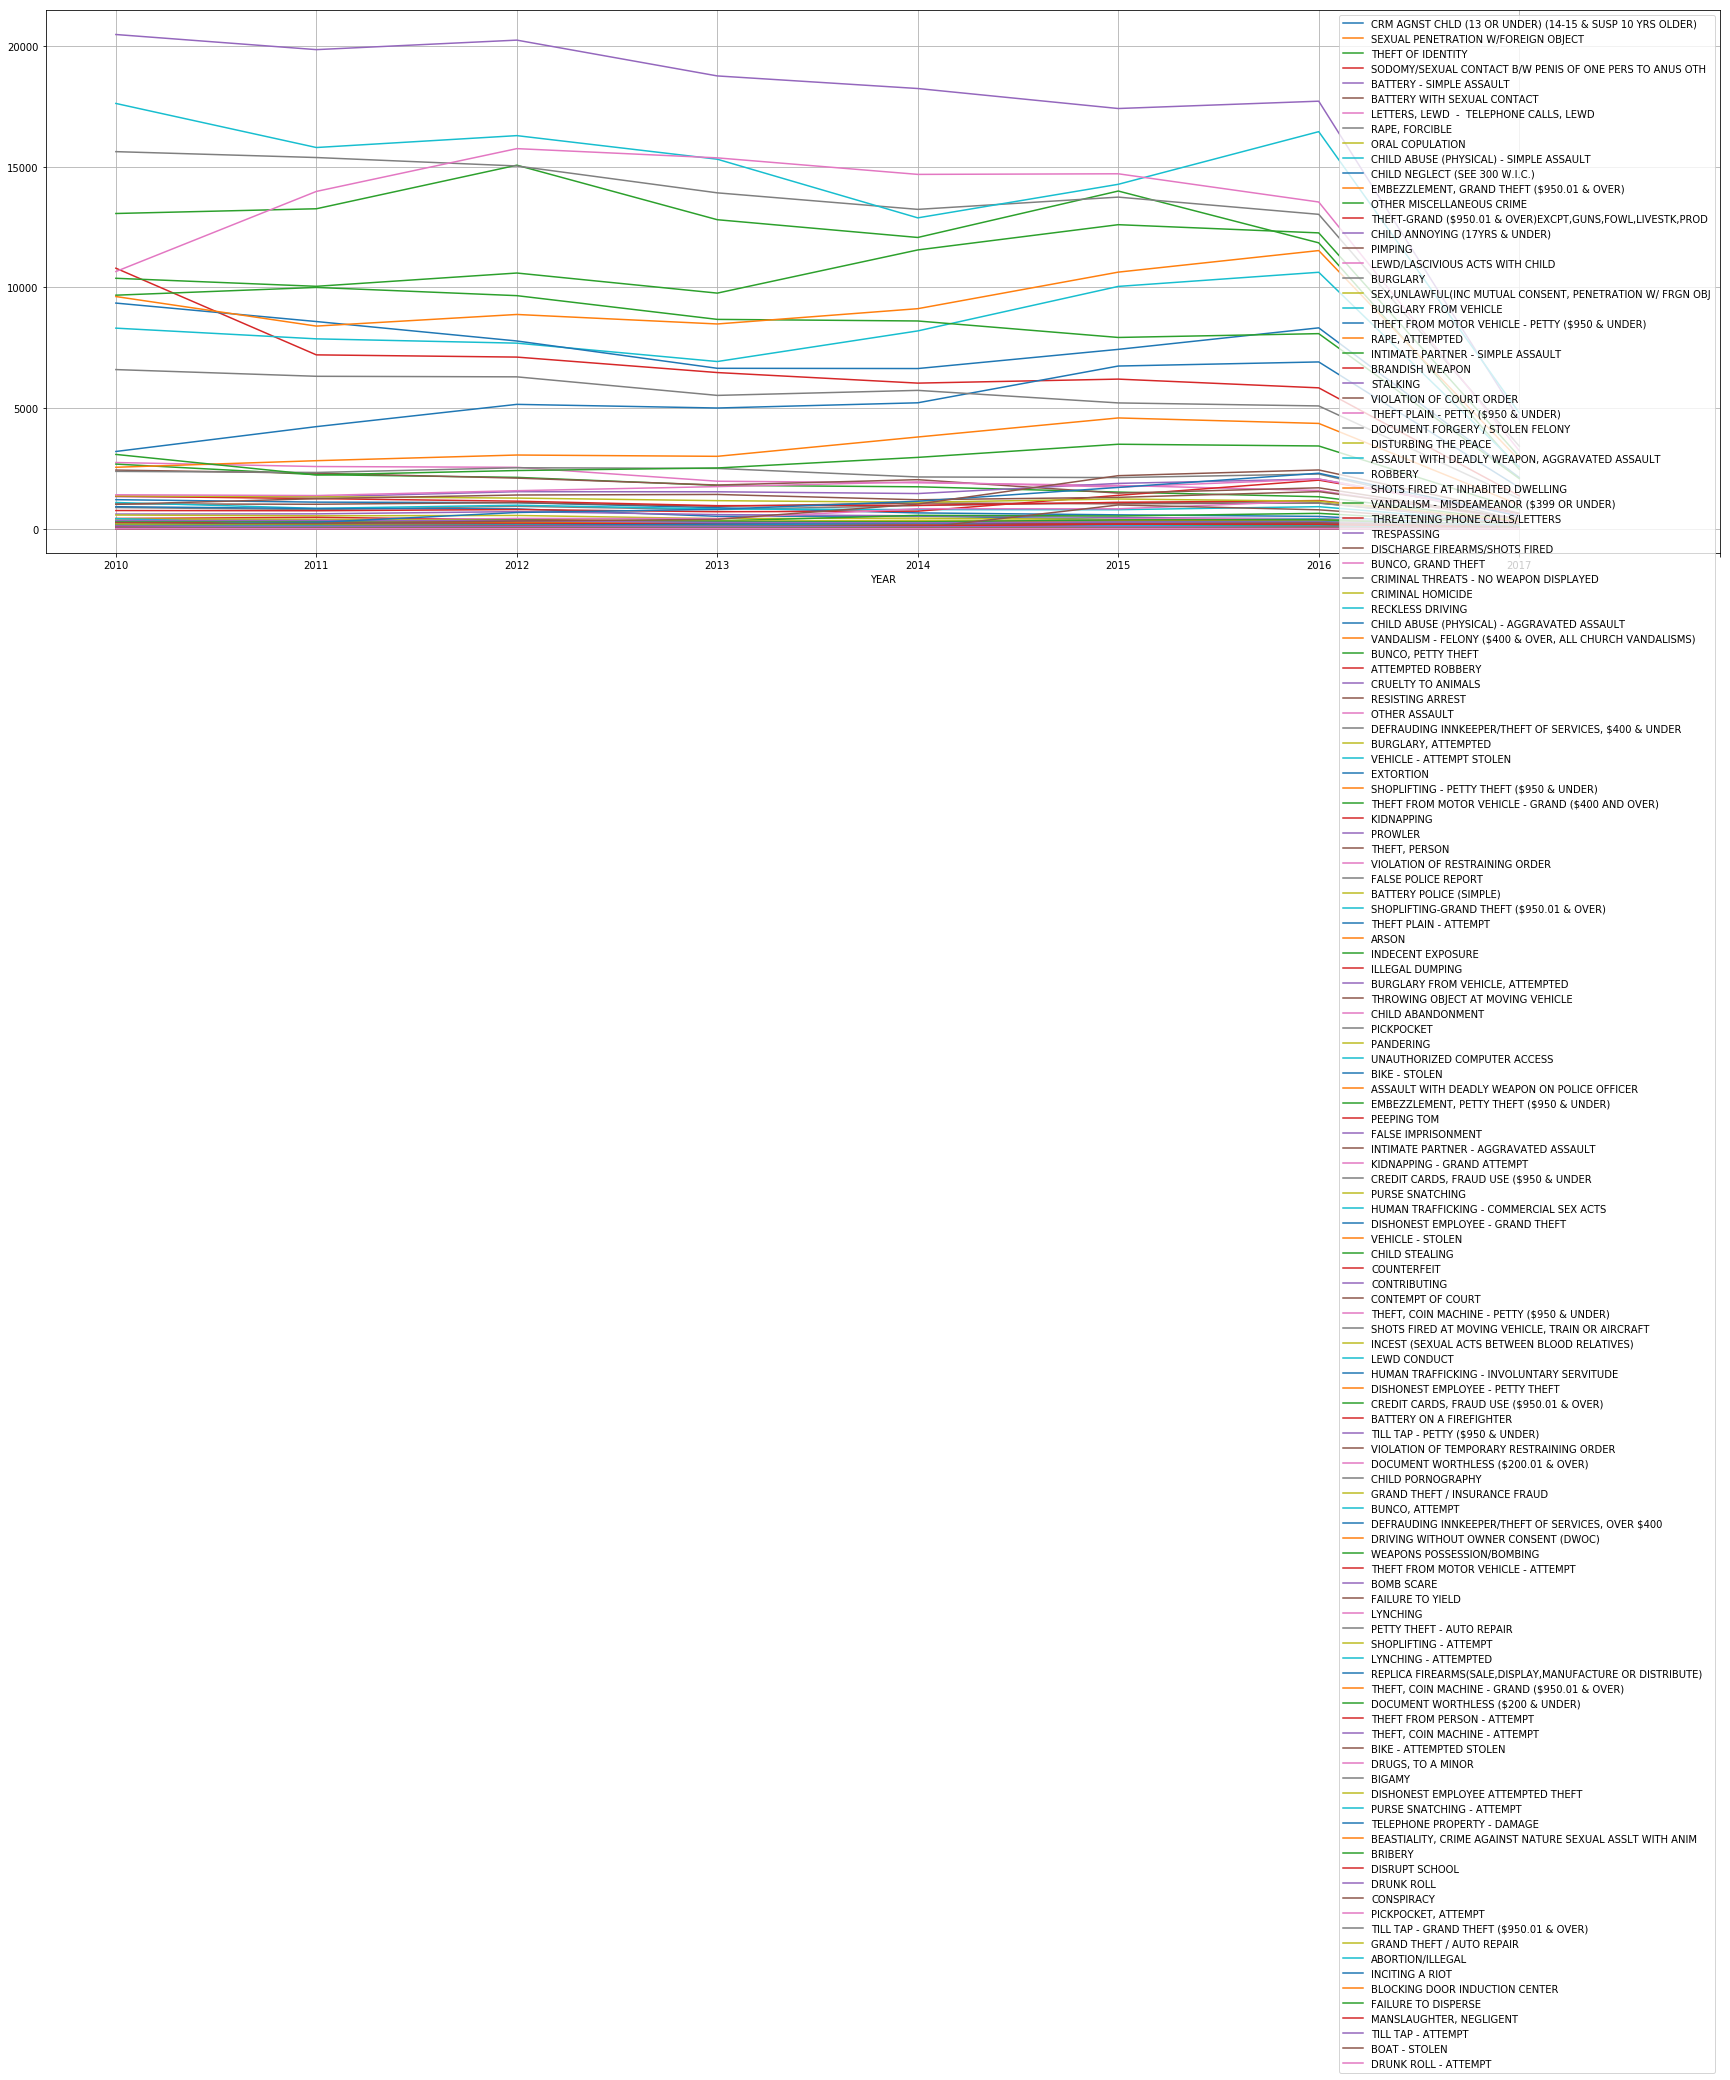

In [25]:
# our final graph based on crime type and years
yearly_crime.plot(x='YEAR', y=crime_type, figsize=(30,10), xticks=(range(0,9)), grid=True)

#### Create the victim age visualization

Create a age_crime function for sorting ages from 0 to 100 with having 10 years increments

In [125]:
# new variable name age_crime for getting age of victims from 2010 to 2017
age_crime = crime_before_2018

In [27]:
def group_age(string):
    if string <= 10.0:
        string = '0 - 10'
    elif 10. < string <= 20.0:
        string = '11 - 20'
    elif 20. < string <= 30.0:
        string = '21 - 30'
    elif 30. < string <= 40.0:
        string = '30 - 40'
    elif 40. < string <= 50.0:
        string = '40 - 50'
    elif 50. < string <= 60.0:
        string = '50 - 60'
    elif 60. < string <= 70.0:
        string = '60 - 70'
    elif 70. < string <= 80.0:
        string = '70 - 80'
    elif 80. < string <= 90.0:
        string = '80 - 90'
    elif 90. < string <= 100.0:
        string = '90 - 100'
    return str(string)

we are using group_age function to sort the previous table and store it into new table call age_crime

In [126]:
age_crime['Victim Age'] = age_crime['Victim Age'].apply(group_age)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
# showing the result
age_crime

Date Occurred  Time Occurred    Area Name  \
1284098          2010              1  West Valley   
1284176          2010           1200      Mission   
1284173          2010           1200      Mission   
1284172          2010           1200    Southeast   
1284170          2010              1    Southeast   
1284168          2010            800    Southeast   
1284167          2010           1200    Southeast   
1284164          2010           1230   Devonshire   
1284163          2010           1200   Devonshire   
1284159          2010           1600     Foothill   
1284158          2010              1     Foothill   
1284156          2010           1200     Foothill   
1284147          2010           1200  N Hollywood   
1284146          2010           1200  N Hollywood   
1284145          2010           1200  N Hollywood   
1284143          2010           1200  N Hollywood   
1284139          2010           1200  N Hollywood   
1284137          2010           1200      Pacific   
1284135          2010            700      Pacific   
1284130          2010            900  77th Street   
1284125          2010           1200  77th Street   
1284124          2010              1  77th Street   
1284183          2010            800      Olympic   
1284184          2010            800      Olympic   
1284187          2010           1200      Olympic   
1284188          2010           1200      Olympic   
1284262          2010            100  West Valley   
1284261          2010              1     Van Nuys   
1284259          2010           1500     Van Nuys   
1284257          2010              1      West LA   
...               ...            ...          ...   
564136           2016           2030   Devonshire   
562527           2016           1635  77th Street   
563022           2016            710      Pacific   
564130           2016           1320   Devonshire   
564140           2016           1800   Devonshire   
564493           2016           2356    Southeast   
562525           2016           1100  77th Street   
564489           2016           2115    Southeast   
564500           2016           1230    Southeast   
564231           2016           1800   Devonshire   
563031           2016           2030      Pacific   
564514           2016             40    Southeast   
564159           2016           1315   Devonshire   
564156           2016           2110   Devonshire   
352273           2016           1050      Central   
352271           2016           1900      Central   
375211           2016           1745    Southwest   
352270           2016           1015      Central   
563004           2016           2000      Pacific   
564167           2016           1200   Devonshire   
375212           2016            300    Southwest   
562584           2016              1  77th Street   
528042           2016            848    Southeast   
562576           2016           2100  77th Street   
528036           2016             20    Southeast   
375204           2016            515    Southwest   
564195           2016           1315   Devonshire   
1032816          2017           2000      West LA   
1036303          2017              1    Southeast   
1029339          2017              1       Newton   

                                    Crime Code Description Victim Age  \
1284098  CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...     0 - 10   
1284176                SEXUAL PENETRATION W/FOREIGN OBJECT     0 - 10   
1284173  CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 ...     0 - 10   
1284172                                  THEFT OF IDENTITY    21 - 30   
1284170  SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO...     0 - 10   
1284168                SEXUAL PENETRATION W/FOREIGN OBJECT     0 - 10   
1284167                                  THEFT OF IDENTITY    60 - 70   
1284164                           BATTERY - SIMPLE ASSAULT    40 - 50   
1284163                                  THEFT OF IDENTITY    50

In [30]:
age_crime = age_crime.sort_values(by= ['Victim Age'])

In [31]:
age_crime.groupby(['Victim Age', 'Crime Code Description']).size()

Victim Age  Crime Code Description                                  
0 - 10      ARSON                                                        558
            ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                 650
            ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              1666
            ATTEMPTED ROBBERY                                            430
            BATTERY - SIMPLE ASSAULT                                    2524
            BATTERY ON A FIREFIGHTER                                      44
            BATTERY POLICE (SIMPLE)                                     1468
            BATTERY WITH SEXUAL CONTACT                                  269
            BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM       8
            BIKE - ATTEMPTED STOLEN                                        2
            BIKE - STOLEN                                                 99
            BLOCKING DOOR INDUCTION CENTER                                 1
       

In [32]:
crime_type.append("Victim Age")

In [33]:
victim_age_crime = pd.DataFrame(columns = crime_type)

In [34]:
victim_age_crime

Empty DataFrame
Columns: [CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER), SEXUAL PENETRATION W/FOREIGN OBJECT, THEFT OF IDENTITY, SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH, BATTERY - SIMPLE ASSAULT, BATTERY WITH SEXUAL CONTACT, LETTERS, LEWD  -  TELEPHONE CALLS, LEWD, RAPE, FORCIBLE, ORAL COPULATION, CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT, CHILD NEGLECT (SEE 300 W.I.C.), EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER), OTHER MISCELLANEOUS CRIME, THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD, CHILD ANNOYING (17YRS & UNDER), PIMPING, LEWD/LASCIVIOUS ACTS WITH CHILD, BURGLARY, SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ, BURGLARY FROM VEHICLE, THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), RAPE, ATTEMPTED, INTIMATE PARTNER - SIMPLE ASSAULT, BRANDISH WEAPON, STALKING, VIOLATION OF COURT ORDER, THEFT PLAIN - PETTY ($950 & UNDER), DOCUMENT FORGERY / STOLEN FELONY, DISTURBING THE PEACE, ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, ROBBERY, SHOTS FIRED AT INHABITED DWELLING, VANDALISM - MISDEAMEANOR ($399 OR UNDER), THREATENING PHONE CALLS/LETTERS, TRESPASSING, DISCHARGE FIREARMS/SHOTS FIRED, BUNCO, GRAND THEFT, CRIMINAL THREATS - NO WEAPON DISPLAYED, CRIMINAL HOMICIDE, RECKLESS DRIVING, CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT, VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), BUNCO, PETTY THEFT, ATTEMPTED ROBBERY, CRUELTY TO ANIMALS, RESISTING ARREST, OTHER ASSAULT, DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER, BURGLARY, ATTEMPTED, VEHICLE - ATTEMPT STOLEN, EXTORTION, SHOPLIFTING - PETTY THEFT ($950 & UNDER), THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER), KIDNAPPING, PROWLER, THEFT, PERSON, VIOLATION OF RESTRAINING ORDER, FALSE POLICE REPORT, BATTERY POLICE (SIMPLE), SHOPLIFTING-GRAND THEFT ($950.01 & OVER), THEFT PLAIN - ATTEMPT, ARSON, INDECENT EXPOSURE, ILLEGAL DUMPING, BURGLARY FROM VEHICLE, ATTEMPTED, THROWING OBJECT AT MOVING VEHICLE, CHILD ABANDONMENT, PICKPOCKET, PANDERING, UNAUTHORIZED COMPUTER ACCESS, BIKE - STOLEN, ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER, EMBEZZLEMENT, PETTY THEFT ($950 & UNDER), PEEPING TOM, FALSE IMPRISONMENT, INTIMATE PARTNER - AGGRAVATED ASSAULT, KIDNAPPING - GRAND ATTEMPT, CREDIT CARDS, FRAUD USE ($950 & UNDER, PURSE SNATCHING, HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, DISHONEST EMPLOYEE - GRAND THEFT, VEHICLE - STOLEN, CHILD STEALING, COUNTERFEIT, CONTRIBUTING, CONTEMPT OF COURT, THEFT, COIN MACHINE - PETTY ($950 & UNDER), SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT, INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES), LEWD CONDUCT, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, DISHONEST EMPLOYEE - PETTY THEFT, CREDIT CARDS, FRAUD USE ($950.01 & OVER), BATTERY ON A FIREFIGHTER, TILL TAP - PETTY ($950 & UNDER), VIOLATION OF TEMPORARY RESTRAINING ORDER, DOCUMENT WORTHLESS ($200.01 & OVER), CHILD PORNOGRAPHY, GRAND THEFT / INSURANCE FRAUD, BUNCO, ATTEMPT, ...]
Index: []

[0 rows x 138 columns]

In [35]:
# create a new table based on a crime age group
age_group = age_crime['Victim Age'].unique().tolist()

using for each loop to adding data into age_group table and name this new table as victim_age_crime

In [36]:
for i in range(0, len(age_group)):
    temp = age_crime[age_crime['Victim Age'] == age_group[i]]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(age_group[i])
    victim_age_crime.loc[i] = crime_count

In [37]:
victim_age_crime

CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)  \
0                                               3238         
1                                               2785         
2                                                 32         
3                                                 12         
4                                                 10         
5                                                  4         
6                                                  2         
7                                                  0         
8                                                  1         
9                                                  4         

  SEXUAL PENETRATION W/FOREIGN OBJECT THEFT OF IDENTITY  \
0                                 194              1380   
1                                 420              3383   
2                                 389             17719   
3                                 179             19785   
4                                 103             19072   
5                                  59             16626   
6                                  18             10116   
7                                  14              4483   
8                                  13              1744   
9                                   4               286   

  SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH  \
0                                                101        
1                                                250        
2                                                263        
3                                                150        
4                                                 98        
5                                                 41        
6                                                 14        
7                                                  1        
8                                                  1        
9                                                  0        

  BATTERY - SIMPLE ASSAULT BATTERY WITH SEXUAL CONTACT  \
0                     2524                         269   
1                    20777                        2751   
2                    37470                        2082   
3                    26240                        1036   
4                    23236                         719   
5                    17541                         408   
6                     6717                         131   
7                     1994                          61   
8                      621                          17   
9                      176                           8   

  LETTERS, LEWD  -  TELEPHONE CALLS, LEWD RAPE, FORCIBLE ORAL COPULATION  \
0                                     301            189             171   
1                                    1418           2255             439   
2                                    3905           2316             269   
3                                    3840            986             104   
4                                    2881            627              86   
5                                    1802            297              50   
6                                     793             68              12   
7                                     325             13               4   
8                                     162              7               1   
9                                      42              5               1   

  CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT    ...      \
0                                    3408    ...       
1                                    2955    ...       
2                                      31    ...       
3                                      21    ...       
4                                       8    ...       
5                                       1    ...       
6                                       1    ...       
7                                       1    ...       
8                

In [38]:
crime_type.pop()

'Victim Age'

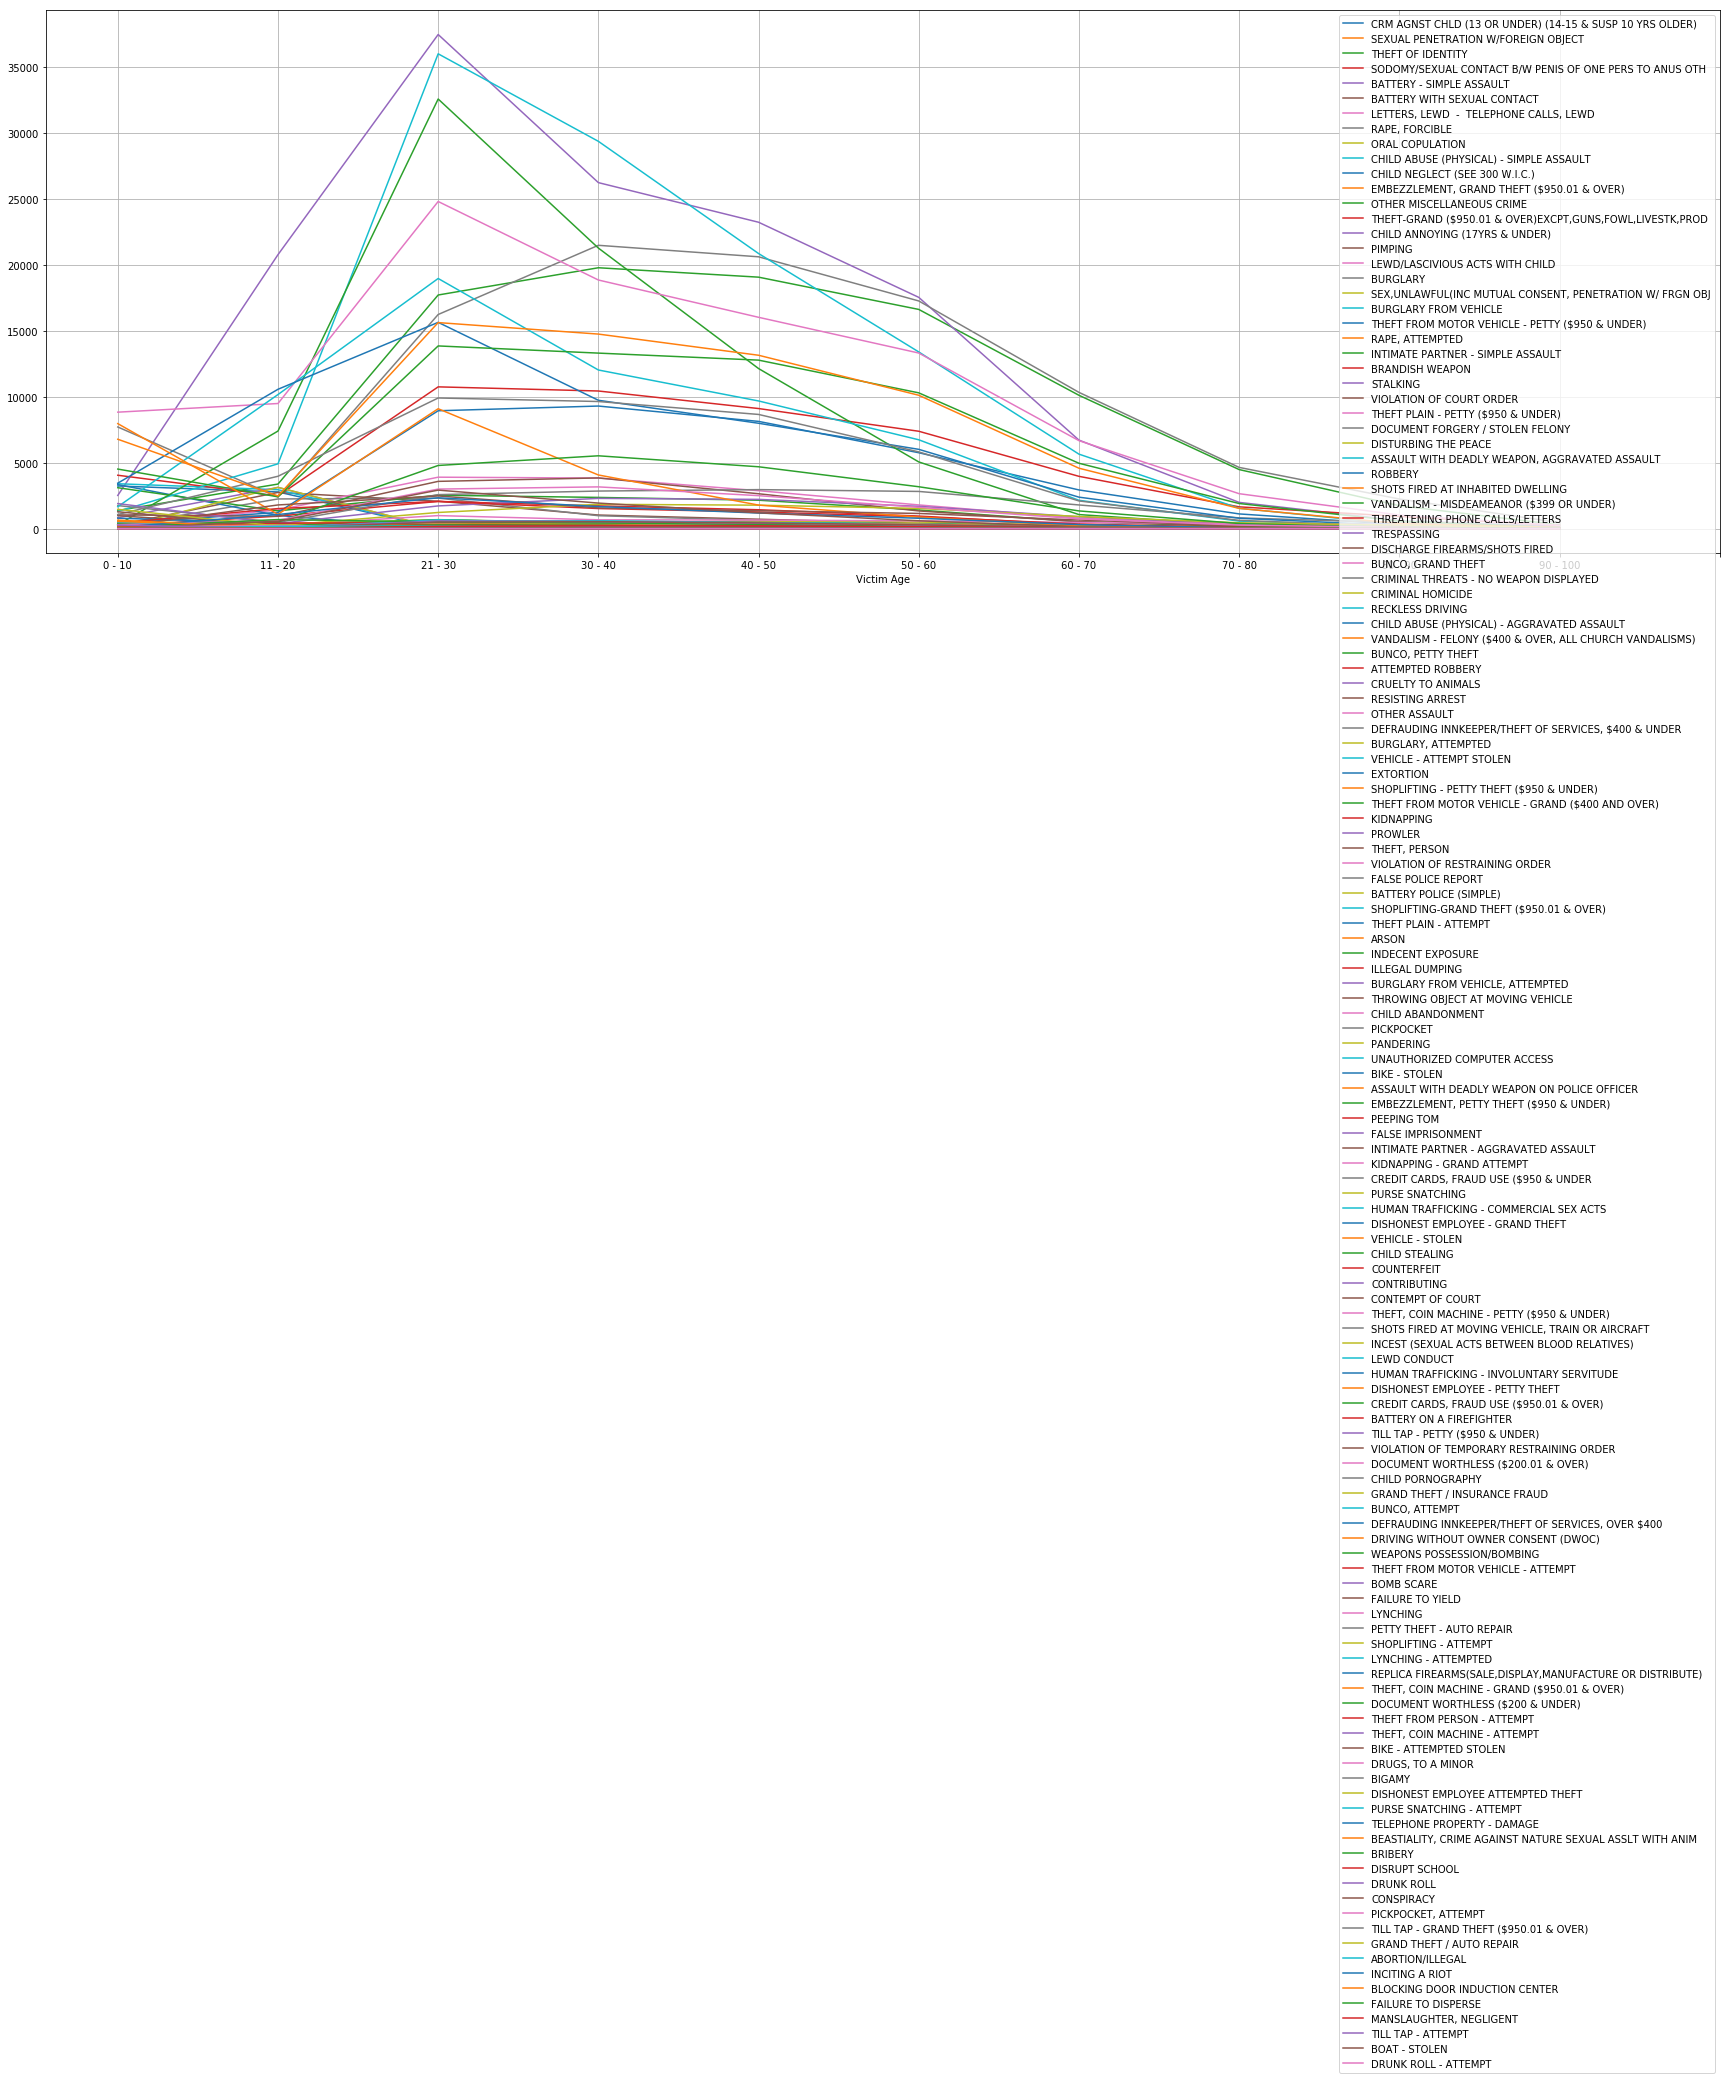

In [39]:
# our final graph based on crime type and group age
victim_age_crime.plot(x='Victim Age', y=crime_type, figsize=(30,10), xticks=(range(0,11)), grid=True)

#### Create the Area Name Visualization

Create a new table for area of crimes from 2010 to 2018

In [40]:
# making new variable call area_crime
area_crime = crime_before_2018

In [41]:
# sort them based on Area Name
area_crime = area_crime.sort_values(by= ['Area Name'])

In [42]:
# combined Crime code Description with area name
area_crime.groupby(['Area Name', 'Crime Code Description']).size()

Area Name    Crime Code Description                                  
77th Street  ARSON                                                         223
             ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                   79
             ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               8216
             ATTEMPTED ROBBERY                                             919
             BATTERY - SIMPLE ASSAULT                                    11620
             BATTERY ON A FIREFIGHTER                                        5
             BATTERY POLICE (SIMPLE)                                       279
             BATTERY WITH SEXUAL CONTACT                                   391
             BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM        3
             BIGAMY                                                          2
             BIKE - ATTEMPTED STOLEN                                         1
             BIKE - STOLEN                                   

In [43]:
crime_type.append("Area Name")

In [44]:
# create a new table to have both crime code description and area of crime
area_name_crime = pd.DataFrame(columns = crime_type)

In [45]:
# check the columns
area_name_crime

Empty DataFrame
Columns: [CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER), SEXUAL PENETRATION W/FOREIGN OBJECT, THEFT OF IDENTITY, SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH, BATTERY - SIMPLE ASSAULT, BATTERY WITH SEXUAL CONTACT, LETTERS, LEWD  -  TELEPHONE CALLS, LEWD, RAPE, FORCIBLE, ORAL COPULATION, CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT, CHILD NEGLECT (SEE 300 W.I.C.), EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER), OTHER MISCELLANEOUS CRIME, THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD, CHILD ANNOYING (17YRS & UNDER), PIMPING, LEWD/LASCIVIOUS ACTS WITH CHILD, BURGLARY, SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ, BURGLARY FROM VEHICLE, THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), RAPE, ATTEMPTED, INTIMATE PARTNER - SIMPLE ASSAULT, BRANDISH WEAPON, STALKING, VIOLATION OF COURT ORDER, THEFT PLAIN - PETTY ($950 & UNDER), DOCUMENT FORGERY / STOLEN FELONY, DISTURBING THE PEACE, ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, ROBBERY, SHOTS FIRED AT INHABITED DWELLING, VANDALISM - MISDEAMEANOR ($399 OR UNDER), THREATENING PHONE CALLS/LETTERS, TRESPASSING, DISCHARGE FIREARMS/SHOTS FIRED, BUNCO, GRAND THEFT, CRIMINAL THREATS - NO WEAPON DISPLAYED, CRIMINAL HOMICIDE, RECKLESS DRIVING, CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT, VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), BUNCO, PETTY THEFT, ATTEMPTED ROBBERY, CRUELTY TO ANIMALS, RESISTING ARREST, OTHER ASSAULT, DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER, BURGLARY, ATTEMPTED, VEHICLE - ATTEMPT STOLEN, EXTORTION, SHOPLIFTING - PETTY THEFT ($950 & UNDER), THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER), KIDNAPPING, PROWLER, THEFT, PERSON, VIOLATION OF RESTRAINING ORDER, FALSE POLICE REPORT, BATTERY POLICE (SIMPLE), SHOPLIFTING-GRAND THEFT ($950.01 & OVER), THEFT PLAIN - ATTEMPT, ARSON, INDECENT EXPOSURE, ILLEGAL DUMPING, BURGLARY FROM VEHICLE, ATTEMPTED, THROWING OBJECT AT MOVING VEHICLE, CHILD ABANDONMENT, PICKPOCKET, PANDERING, UNAUTHORIZED COMPUTER ACCESS, BIKE - STOLEN, ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER, EMBEZZLEMENT, PETTY THEFT ($950 & UNDER), PEEPING TOM, FALSE IMPRISONMENT, INTIMATE PARTNER - AGGRAVATED ASSAULT, KIDNAPPING - GRAND ATTEMPT, CREDIT CARDS, FRAUD USE ($950 & UNDER, PURSE SNATCHING, HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, DISHONEST EMPLOYEE - GRAND THEFT, VEHICLE - STOLEN, CHILD STEALING, COUNTERFEIT, CONTRIBUTING, CONTEMPT OF COURT, THEFT, COIN MACHINE - PETTY ($950 & UNDER), SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT, INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES), LEWD CONDUCT, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, DISHONEST EMPLOYEE - PETTY THEFT, CREDIT CARDS, FRAUD USE ($950.01 & OVER), BATTERY ON A FIREFIGHTER, TILL TAP - PETTY ($950 & UNDER), VIOLATION OF TEMPORARY RESTRAINING ORDER, DOCUMENT WORTHLESS ($200.01 & OVER), CHILD PORNOGRAPHY, GRAND THEFT / INSURANCE FRAUD, BUNCO, ATTEMPT, ...]
Index: []

[0 rows x 138 columns]

In [46]:
# # create a new table based on a crime area
area_group = area_crime['Area Name'].unique().tolist()

In [ ]:
using for each loop to adding data into area_group table and name this new table as area_name_crime

In [47]:
for i in range(0, len(area_group)):
    temp = area_crime[area_crime['Area Name'] == area_group[i]]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(area_group[i])
    area_name_crime.loc[i] = crime_count

In [48]:
# check the table
area_name_crime

CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)  \
0                                                 601         
1                                                  45         
2                                                 187         
3                                                 320         
4                                                 278         
5                                                 341         
6                                                 107         
7                                                 557         
8                                                 235         
9                                                 434         
10                                                274         
11                                                348         
12                                                155         
13                                                352         
14                                                468         
15                                                446         
16                                                199         
17                                                236         
18                                                112         
19                                                208         
20                                                185         

   SEXUAL PENETRATION W/FOREIGN OBJECT THEFT OF IDENTITY  \
0                                   90              4884   
1                                   71              1583   
2                                   67              6004   
3                                   37              4539   
4                                   63              3733   
5                                   63              2682   
6                                  118              4114   
7                                   64              5577   
8                                   64              6922   
9                                   56              2122   
10                                  74              5177   
11                                  77              3772   
12                                  67              4664   
13                                  72              2974   
14                                  52              2742   
15                                  86              4936   
16                                  57              5823   
17                                  77              6219   
18                                  52              5780   
19                                  42              5939   
20                                  44              4408   

   SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH  \
0                                                  67        
1                                                  65        
2                                                  31        
3                                                  40        
4                                                  37        
5                                                  45        
6                                                  84        
7                                                  44        
8                                                  49        
9                                                  39        
10                                                 29        
11                                                 28        
12                                                 30        
13                                                 69        
14                                                 44        
15                                                 49        
16                                                 34        
17                                                 35        
18                                                 32        
19                                                 25  

In [49]:
crime_type.pop()

'Area Name'

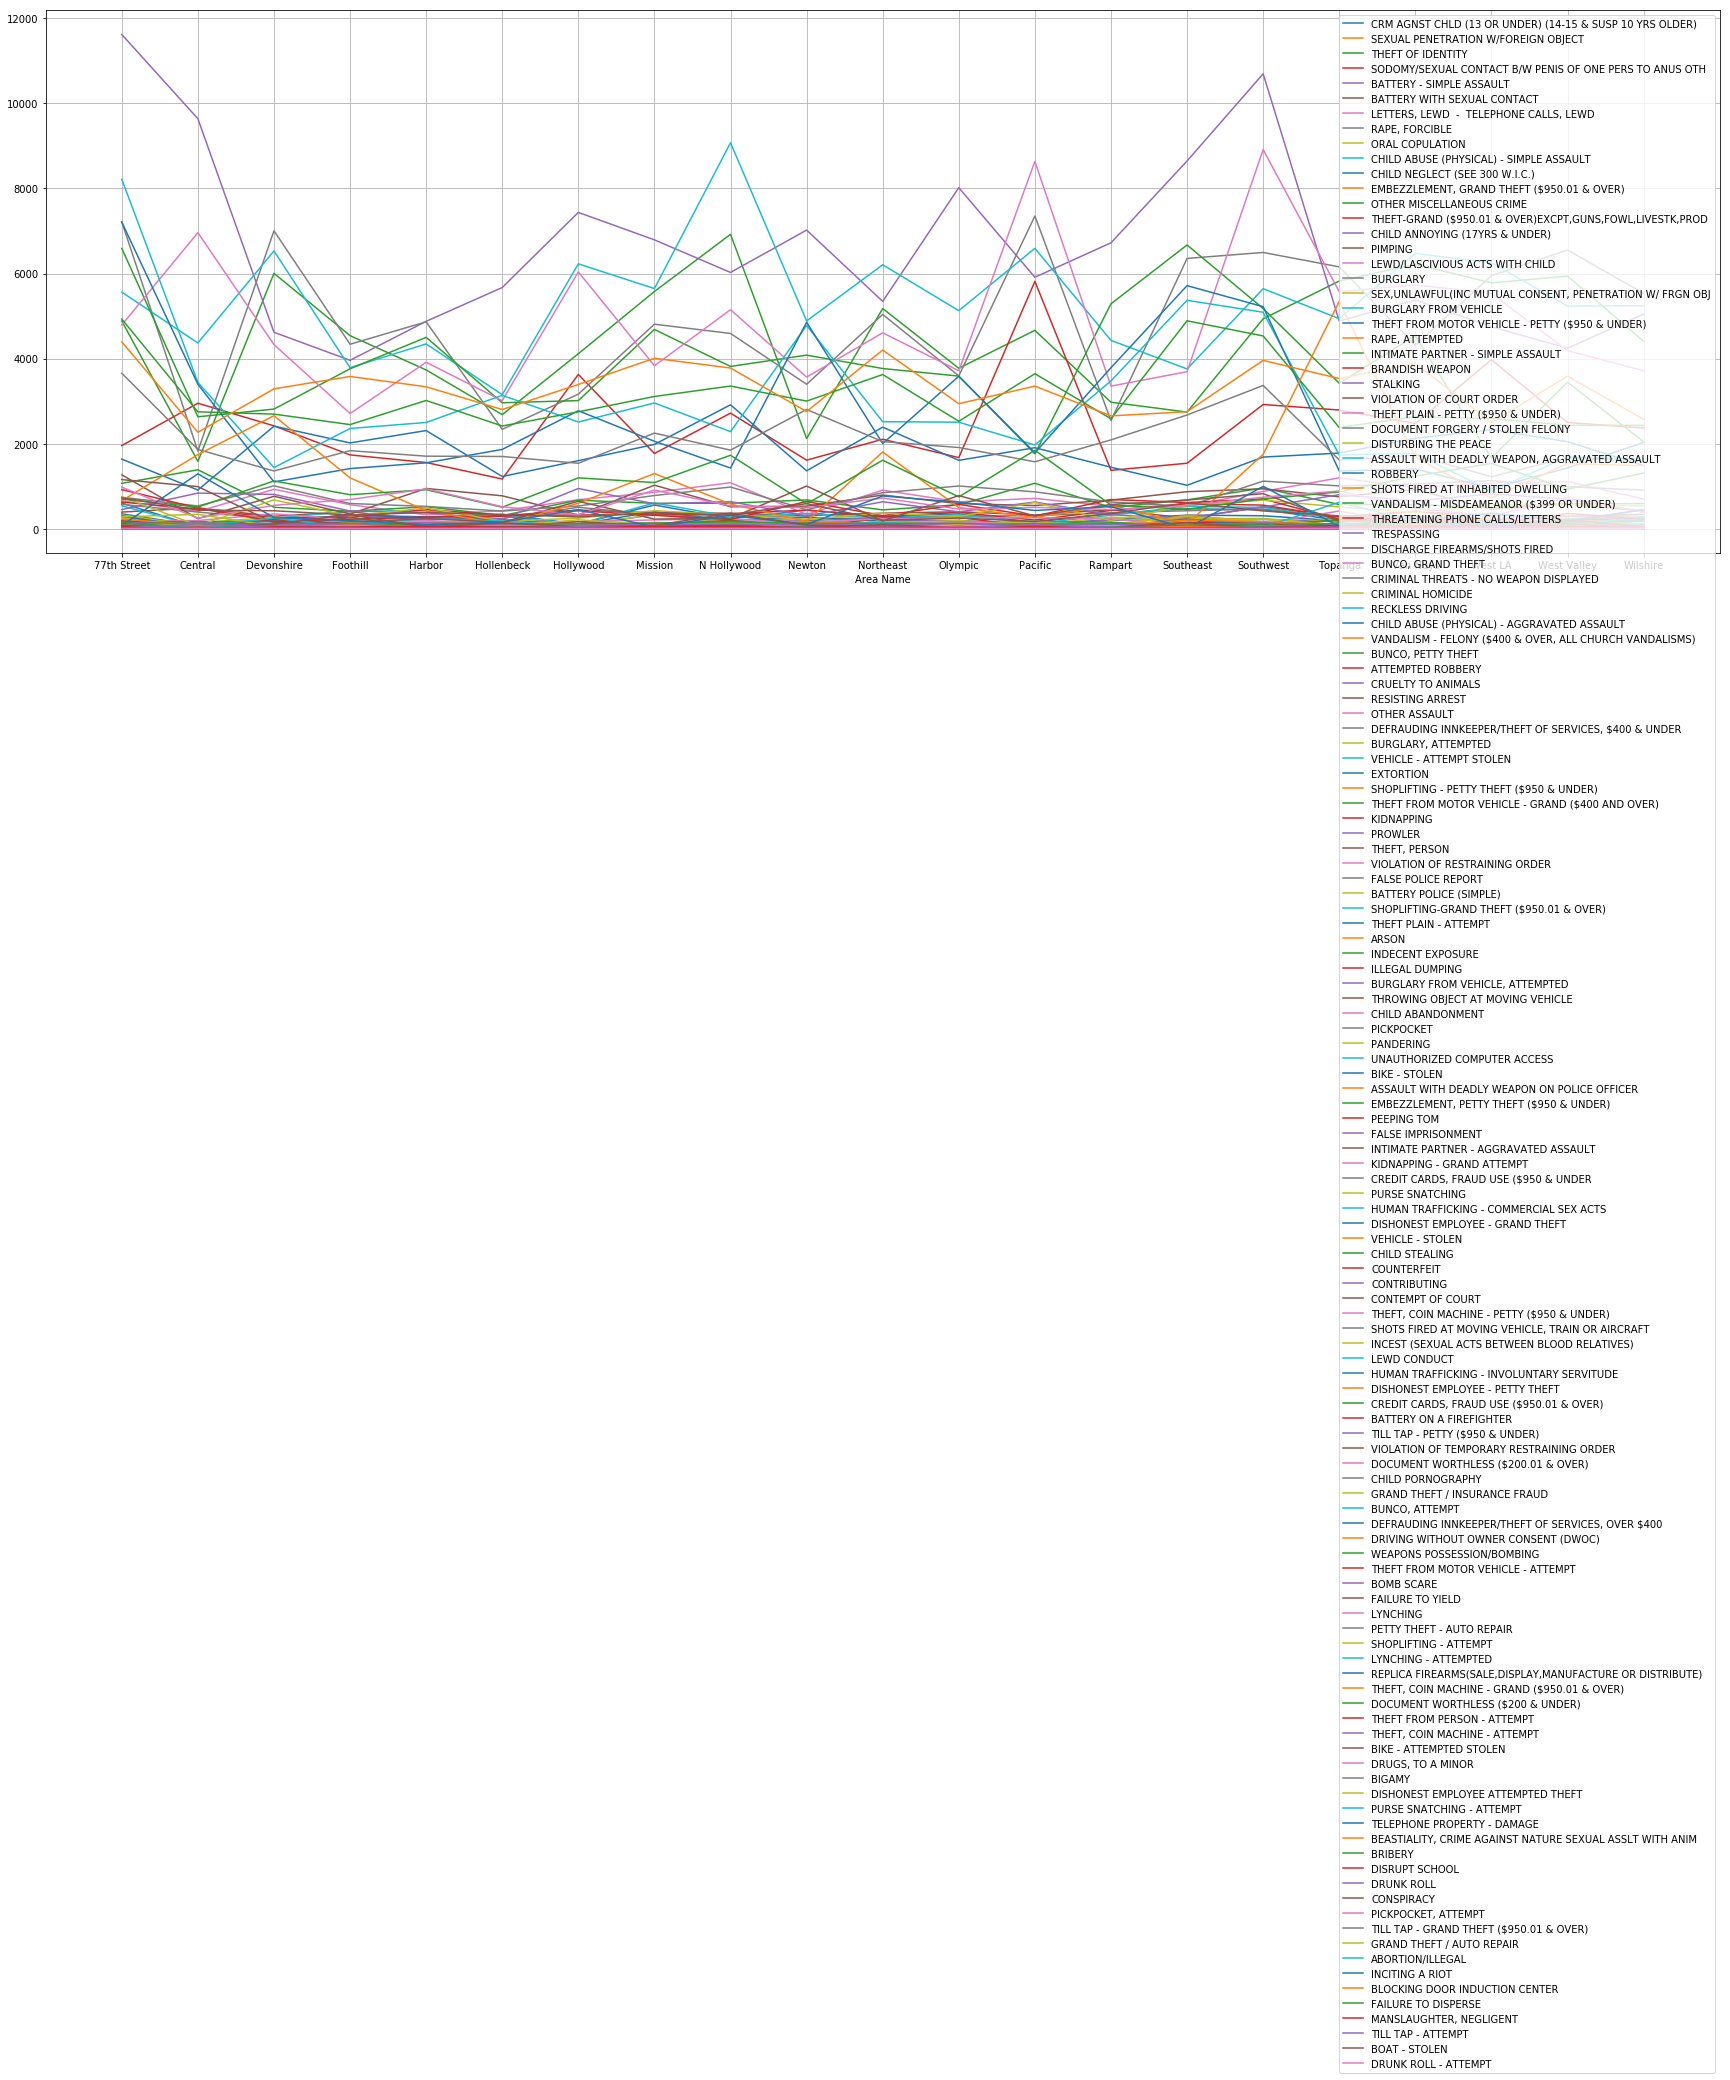

In [50]:
#  our final graph based on crime type and area
area_name_crime.plot(x='Area Name', y=crime_type, figsize=(30,10), xticks=(range(0,21)), grid=True)

#### Create Victim Gender Visualization

gender of victims from 2010 to 2017

In [51]:
gender_table = crime_before_2018

In [52]:
# combined Crime code Description with Victim Sex
gender_table.groupby(['Victim Sex', 'Crime Code Description']).size()

Victim Sex  Crime Code Description                                  
F           ABORTION/ILLEGAL                                                1
            ARSON                                                         724
            ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                  101
            ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              17033
            ATTEMPTED ROBBERY                                            2325
            BATTERY - SIMPLE ASSAULT                                    73611
            BATTERY ON A FIREFIGHTER                                       12
            BATTERY POLICE (SIMPLE)                                       341
            BATTERY WITH SEXUAL CONTACT                                  6889
            BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM        4
            BIGAMY                                                          6
            BIKE - ATTEMPTED STOLEN                                      

In [53]:
crime_type.append("Victim Sex")

In [54]:
# create a new table to have both crime code description and Victim Sex
victim_gender_crime = pd.DataFrame(columns = crime_type)

In [55]:
# check the columns
victim_gender_crime

Empty DataFrame
Columns: [CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER), SEXUAL PENETRATION W/FOREIGN OBJECT, THEFT OF IDENTITY, SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH, BATTERY - SIMPLE ASSAULT, BATTERY WITH SEXUAL CONTACT, LETTERS, LEWD  -  TELEPHONE CALLS, LEWD, RAPE, FORCIBLE, ORAL COPULATION, CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT, CHILD NEGLECT (SEE 300 W.I.C.), EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER), OTHER MISCELLANEOUS CRIME, THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD, CHILD ANNOYING (17YRS & UNDER), PIMPING, LEWD/LASCIVIOUS ACTS WITH CHILD, BURGLARY, SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ, BURGLARY FROM VEHICLE, THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), RAPE, ATTEMPTED, INTIMATE PARTNER - SIMPLE ASSAULT, BRANDISH WEAPON, STALKING, VIOLATION OF COURT ORDER, THEFT PLAIN - PETTY ($950 & UNDER), DOCUMENT FORGERY / STOLEN FELONY, DISTURBING THE PEACE, ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, ROBBERY, SHOTS FIRED AT INHABITED DWELLING, VANDALISM - MISDEAMEANOR ($399 OR UNDER), THREATENING PHONE CALLS/LETTERS, TRESPASSING, DISCHARGE FIREARMS/SHOTS FIRED, BUNCO, GRAND THEFT, CRIMINAL THREATS - NO WEAPON DISPLAYED, CRIMINAL HOMICIDE, RECKLESS DRIVING, CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT, VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), BUNCO, PETTY THEFT, ATTEMPTED ROBBERY, CRUELTY TO ANIMALS, RESISTING ARREST, OTHER ASSAULT, DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER, BURGLARY, ATTEMPTED, VEHICLE - ATTEMPT STOLEN, EXTORTION, SHOPLIFTING - PETTY THEFT ($950 & UNDER), THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER), KIDNAPPING, PROWLER, THEFT, PERSON, VIOLATION OF RESTRAINING ORDER, FALSE POLICE REPORT, BATTERY POLICE (SIMPLE), SHOPLIFTING-GRAND THEFT ($950.01 & OVER), THEFT PLAIN - ATTEMPT, ARSON, INDECENT EXPOSURE, ILLEGAL DUMPING, BURGLARY FROM VEHICLE, ATTEMPTED, THROWING OBJECT AT MOVING VEHICLE, CHILD ABANDONMENT, PICKPOCKET, PANDERING, UNAUTHORIZED COMPUTER ACCESS, BIKE - STOLEN, ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER, EMBEZZLEMENT, PETTY THEFT ($950 & UNDER), PEEPING TOM, FALSE IMPRISONMENT, INTIMATE PARTNER - AGGRAVATED ASSAULT, KIDNAPPING - GRAND ATTEMPT, CREDIT CARDS, FRAUD USE ($950 & UNDER, PURSE SNATCHING, HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, DISHONEST EMPLOYEE - GRAND THEFT, VEHICLE - STOLEN, CHILD STEALING, COUNTERFEIT, CONTRIBUTING, CONTEMPT OF COURT, THEFT, COIN MACHINE - PETTY ($950 & UNDER), SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT, INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES), LEWD CONDUCT, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, DISHONEST EMPLOYEE - PETTY THEFT, CREDIT CARDS, FRAUD USE ($950.01 & OVER), BATTERY ON A FIREFIGHTER, TILL TAP - PETTY ($950 & UNDER), VIOLATION OF TEMPORARY RESTRAINING ORDER, DOCUMENT WORTHLESS ($200.01 & OVER), CHILD PORNOGRAPHY, GRAND THEFT / INSURANCE FRAUD, BUNCO, ATTEMPT, ...]
Index: []

[0 rows x 138 columns]

In [56]:
# create a new table called gender_group based on a Victime sex
gender_group = gender_table['Victim Sex'].unique().tolist()

using for each loop to adding data into gender_group table and name this new table as victim_gender_crime

In [57]:
for i in range(0, len(gender_group)):
    temp = gender_table[gender_table['Victim Sex'] == gender_group[i]]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(gender_group[i])
    victim_gender_crime.loc[i] = crime_count

In [58]:
crime_type.pop()

'Victim Sex'

In [59]:
#  our final graph based on crime type and vicitm sex
victim_gender_crime.plot(x='Victim Sex', y=crime_type, figsize=(30,10), xticks=(range(0,2)), grid=True)

#### Create Victim Descent Visualization

Descent of victims from 2010 to 2017

In [60]:
descent_table = crime_before_2018

In [61]:
# combined Crime code Description with Victim Descent
descent_table.groupby(['Victim Descent', 'Crime Code Description']).size()

Victim Descent  Crime Code Description                                  
A               ARSON                                                         19
                ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                  18
                ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               622
                ATTEMPTED ROBBERY                                            181
                BATTERY - SIMPLE ASSAULT                                    2596
                BATTERY ON A FIREFIGHTER                                       5
                BATTERY POLICE (SIMPLE)                                       50
                BATTERY WITH SEXUAL CONTACT                                  199
                BEASTIALITY, CRIME AGAINST NATURE SEXUAL ASSLT WITH ANIM       1
                BIKE - ATTEMPTED STOLEN                                        1
                BIKE - STOLEN                                                465
                BOMB SCARE          

In [62]:
crime_type.append("Victim Descent")

In [63]:
# create a new table name victim_descent_crime to have both crime code description and Victim Descent
victim_descent_crime = pd.DataFrame(columns = crime_type)

In [64]:
# check the new columns
victim_descent_crime

Empty DataFrame
Columns: [CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER), SEXUAL PENETRATION W/FOREIGN OBJECT, THEFT OF IDENTITY, SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH, BATTERY - SIMPLE ASSAULT, BATTERY WITH SEXUAL CONTACT, LETTERS, LEWD  -  TELEPHONE CALLS, LEWD, RAPE, FORCIBLE, ORAL COPULATION, CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT, CHILD NEGLECT (SEE 300 W.I.C.), EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER), OTHER MISCELLANEOUS CRIME, THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD, CHILD ANNOYING (17YRS & UNDER), PIMPING, LEWD/LASCIVIOUS ACTS WITH CHILD, BURGLARY, SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ, BURGLARY FROM VEHICLE, THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), RAPE, ATTEMPTED, INTIMATE PARTNER - SIMPLE ASSAULT, BRANDISH WEAPON, STALKING, VIOLATION OF COURT ORDER, THEFT PLAIN - PETTY ($950 & UNDER), DOCUMENT FORGERY / STOLEN FELONY, DISTURBING THE PEACE, ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, ROBBERY, SHOTS FIRED AT INHABITED DWELLING, VANDALISM - MISDEAMEANOR ($399 OR UNDER), THREATENING PHONE CALLS/LETTERS, TRESPASSING, DISCHARGE FIREARMS/SHOTS FIRED, BUNCO, GRAND THEFT, CRIMINAL THREATS - NO WEAPON DISPLAYED, CRIMINAL HOMICIDE, RECKLESS DRIVING, CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT, VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), BUNCO, PETTY THEFT, ATTEMPTED ROBBERY, CRUELTY TO ANIMALS, RESISTING ARREST, OTHER ASSAULT, DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER, BURGLARY, ATTEMPTED, VEHICLE - ATTEMPT STOLEN, EXTORTION, SHOPLIFTING - PETTY THEFT ($950 & UNDER), THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER), KIDNAPPING, PROWLER, THEFT, PERSON, VIOLATION OF RESTRAINING ORDER, FALSE POLICE REPORT, BATTERY POLICE (SIMPLE), SHOPLIFTING-GRAND THEFT ($950.01 & OVER), THEFT PLAIN - ATTEMPT, ARSON, INDECENT EXPOSURE, ILLEGAL DUMPING, BURGLARY FROM VEHICLE, ATTEMPTED, THROWING OBJECT AT MOVING VEHICLE, CHILD ABANDONMENT, PICKPOCKET, PANDERING, UNAUTHORIZED COMPUTER ACCESS, BIKE - STOLEN, ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER, EMBEZZLEMENT, PETTY THEFT ($950 & UNDER), PEEPING TOM, FALSE IMPRISONMENT, INTIMATE PARTNER - AGGRAVATED ASSAULT, KIDNAPPING - GRAND ATTEMPT, CREDIT CARDS, FRAUD USE ($950 & UNDER, PURSE SNATCHING, HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, DISHONEST EMPLOYEE - GRAND THEFT, VEHICLE - STOLEN, CHILD STEALING, COUNTERFEIT, CONTRIBUTING, CONTEMPT OF COURT, THEFT, COIN MACHINE - PETTY ($950 & UNDER), SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT, INCEST (SEXUAL ACTS BETWEEN BLOOD RELATIVES), LEWD CONDUCT, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, DISHONEST EMPLOYEE - PETTY THEFT, CREDIT CARDS, FRAUD USE ($950.01 & OVER), BATTERY ON A FIREFIGHTER, TILL TAP - PETTY ($950 & UNDER), VIOLATION OF TEMPORARY RESTRAINING ORDER, DOCUMENT WORTHLESS ($200.01 & OVER), CHILD PORNOGRAPHY, GRAND THEFT / INSURANCE FRAUD, BUNCO, ATTEMPT, ...]
Index: []

[0 rows x 138 columns]

In [65]:
# create a new table name descent_group based on a crime type
descent_group = descent_table['Victim Descent'].unique().tolist()

using for each loop to adding data into descent_group table and name this new table as victim_descent_crime

In [66]:
for i in range(0, len(descent_group)):
    temp = descent_table[descent_table['Victim Descent'] == descent_group[i]]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(descent_group[i])
    victim_descent_crime.loc[i] = crime_count

In [67]:
crime_type.pop()

'Victim Descent'

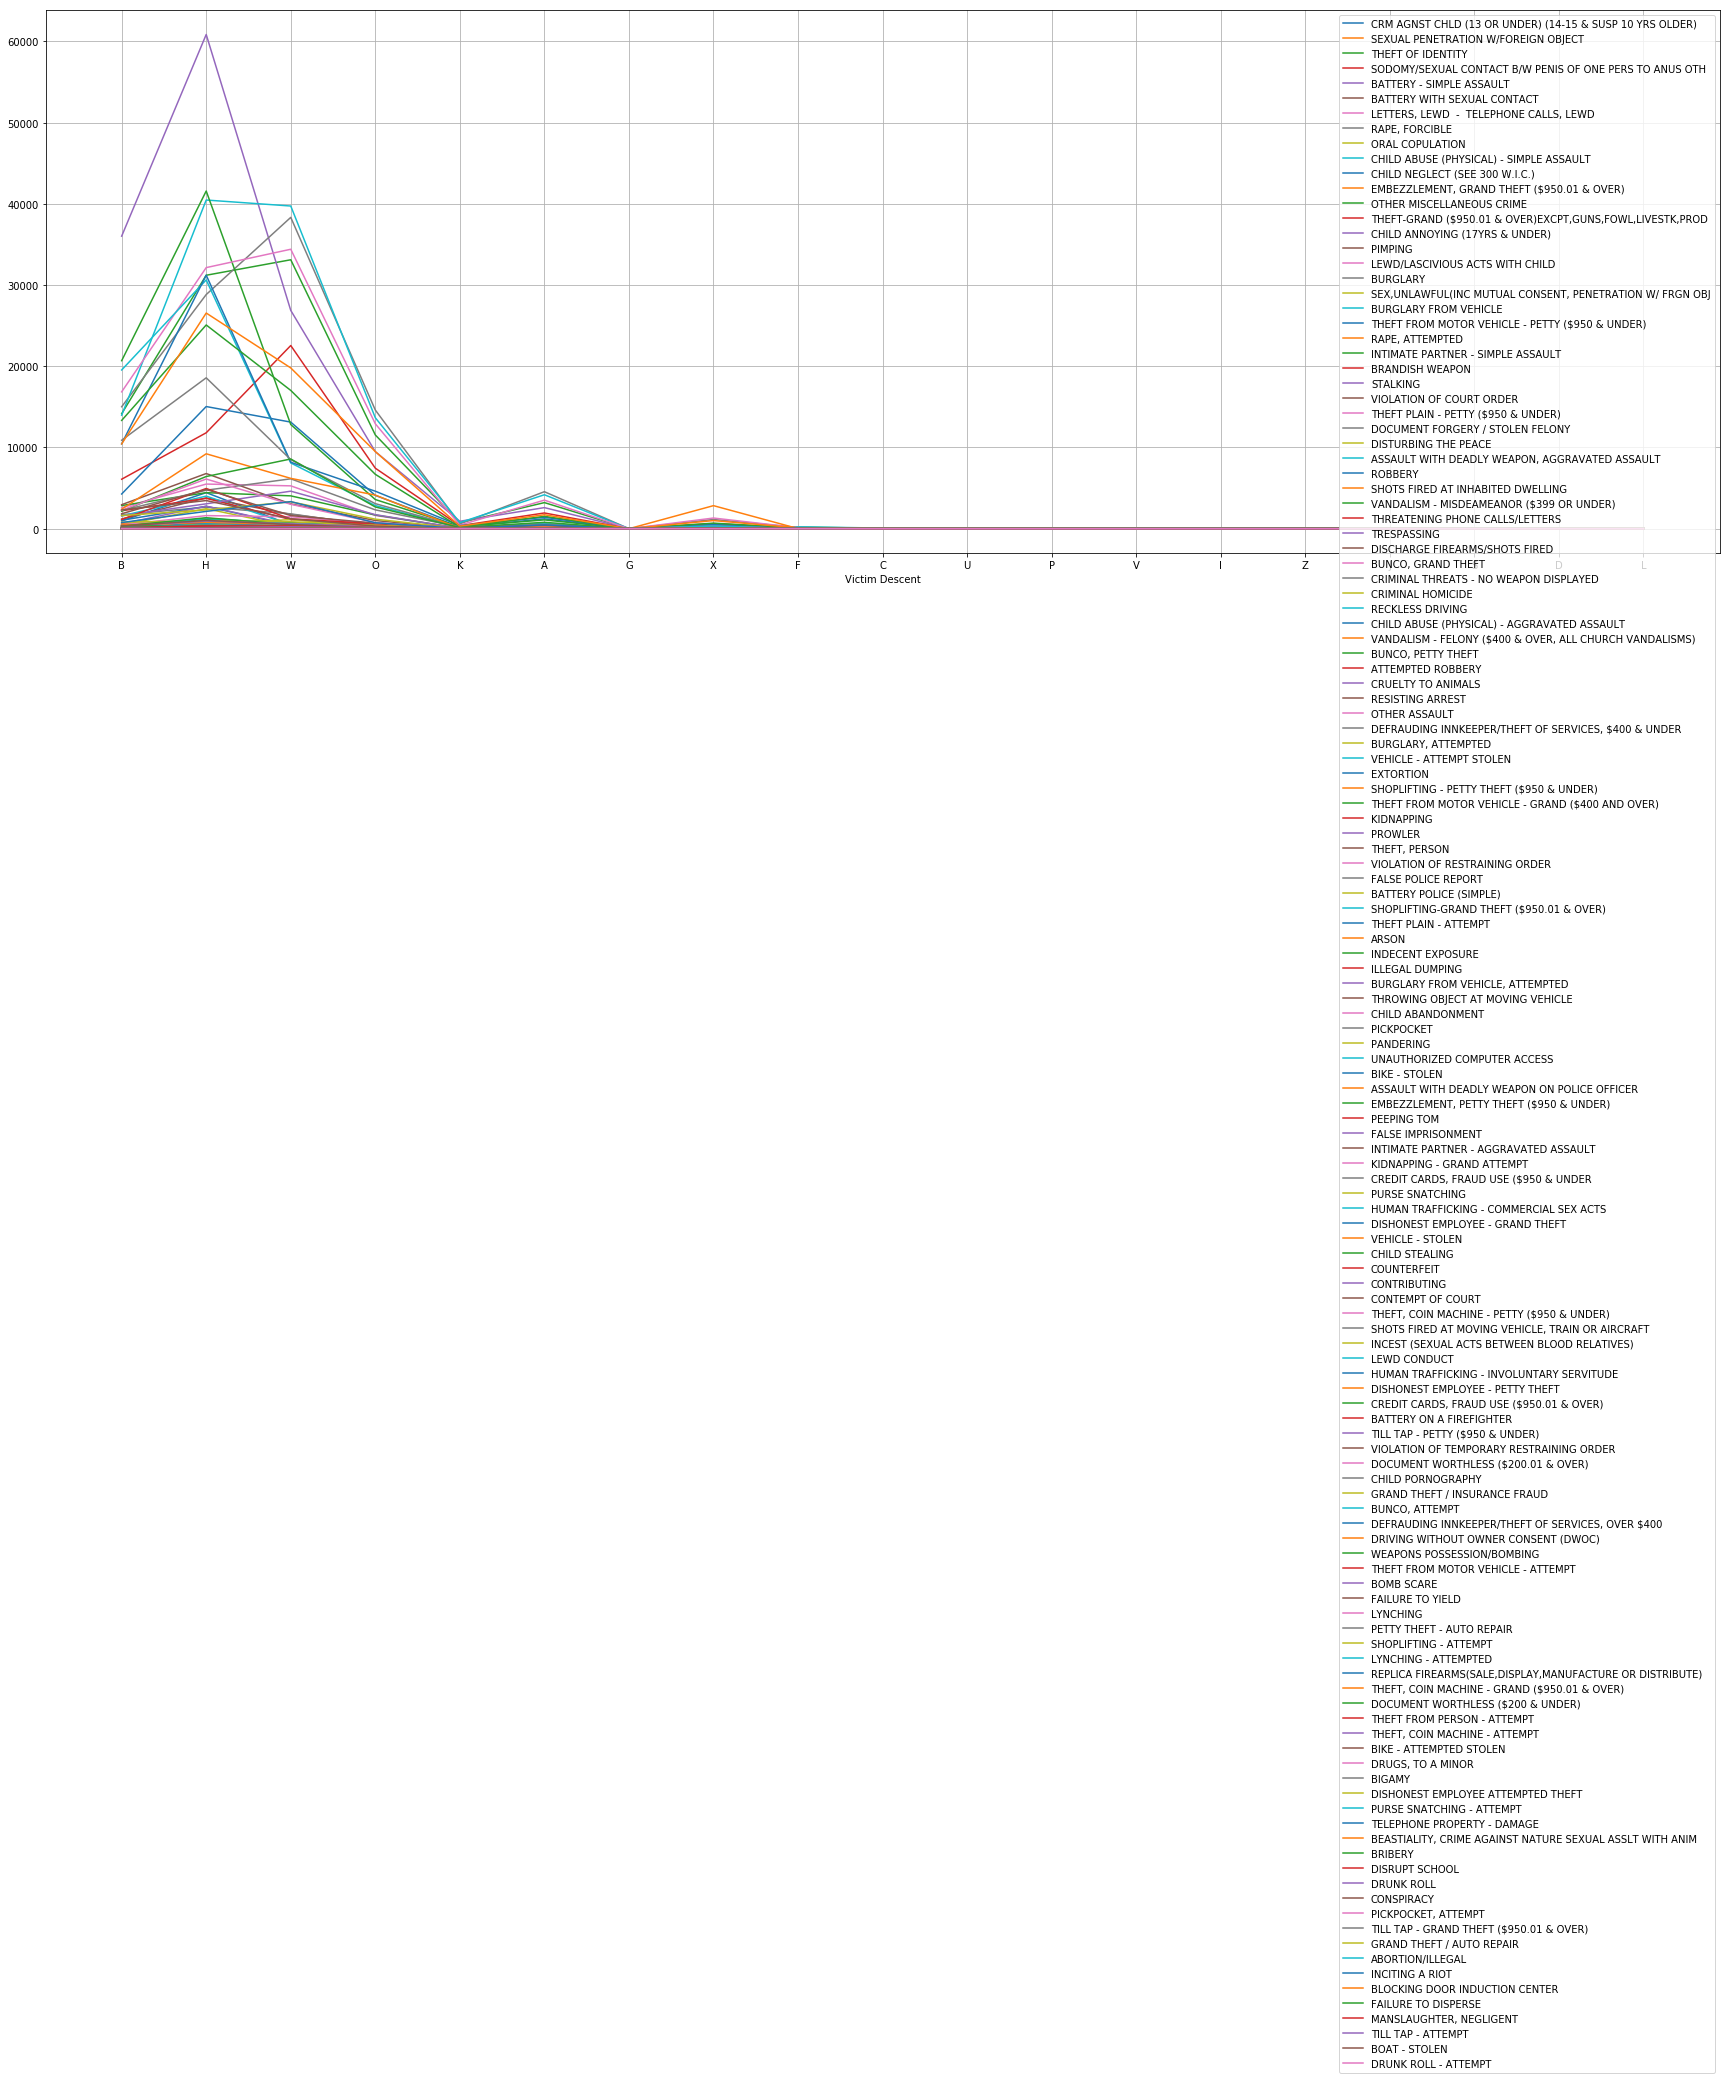

In [68]:
#  our final graph based on crime type and vicitm descent
victim_descent_crime.plot(x='Victim Descent', y=crime_type, figsize=(30,10), xticks=(range(0,len(descent_group))), grid=True)

# Data Visualization Part 2 (2018)

In this section we will going to use get a data for just year of 2018 for all the categories that we discussed 
in above. we will use these data to verify our prediction in part one of Data Visualization

In [69]:
crime_2018 = crime.loc[crime['Date Occurred'] == '2018']

#### Create the 2018 Crime Visualization

In [ ]:
Creating a table for year of 2018 and Crime Code Description

In [70]:
# create a table called temp_table_2018 which is a copy of crime_2018
temp_table_2018 = crime_2018

In [71]:
# Combined Crime code Description with Date Occured
temp_table_2018.groupby(['Date Occurred', 'Crime Code Description']).size()

Date Occurred  Crime Code Description                                  
2018           ARSON                                                         1
               ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER                  1
               ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              241
               ATTEMPTED ROBBERY                                            20
               BATTERY - SIMPLE ASSAULT                                    465
               BATTERY POLICE (SIMPLE)                                       5
               BATTERY WITH SEXUAL CONTACT                                  54
               BIKE - STOLEN                                                15
               BOMB SCARE                                                    2
               BRANDISH WEAPON                                              79
               BUNCO, ATTEMPT                                                1
               BUNCO, GRAND THEFT                          

In [72]:
# create a new table based on a crime type
crime_type = temp_table_2018['Crime Code Description'].unique().tolist()

In [73]:
crime_type.append("YEAR")

In [74]:
# create a new table name yearly_crime_2018 to have both crime code description and year of 2018
yearly_crime_2018 = pd.DataFrame(columns = crime_type)

In [75]:
# check columns
yearly_crime_2018

Empty DataFrame
Columns: [THEFT OF IDENTITY, DOCUMENT FORGERY / STOLEN FELONY, LETTERS, LEWD  -  TELEPHONE CALLS, LEWD, SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ, BURGLARY, THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD, VIOLATION OF COURT ORDER, ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, FALSE IMPRISONMENT, CRIMINAL THREATS - NO WEAPON DISPLAYED, BRANDISH WEAPON, INTIMATE PARTNER - SIMPLE ASSAULT, THROWING OBJECT AT MOVING VEHICLE, LEWD/LASCIVIOUS ACTS WITH CHILD, EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER), BURGLARY FROM VEHICLE, THEFT PLAIN - PETTY ($950 & UNDER), ATTEMPTED ROBBERY, RAPE, FORCIBLE, OTHER MISCELLANEOUS CRIME, BATTERY WITH SEXUAL CONTACT, VANDALISM - MISDEAMEANOR ($399 OR UNDER), VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), BATTERY - SIMPLE ASSAULT, SEXUAL PENETRATION W/FOREIGN OBJECT, THEFT, PERSON, TRESPASSING, CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER), INTIMATE PARTNER - AGGRAVATED ASSAULT, THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), STALKING, BUNCO, GRAND THEFT, BIKE - STOLEN, THEFT FROM MOTOR VEHICLE - ATTEMPT, VIOLATION OF RESTRAINING ORDER, CHILD ANNOYING (17YRS & UNDER), SHOPLIFTING - PETTY THEFT ($950 & UNDER), CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT, ROBBERY, LEWD CONDUCT, SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH, CRIMINAL HOMICIDE, KIDNAPPING - GRAND ATTEMPT, THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER), CREDIT CARDS, FRAUD USE ($950.01 & OVER), PIMPING, EXTORTION, DISTURBING THE PEACE, DISCHARGE FIREARMS/SHOTS FIRED, SHOPLIFTING-GRAND THEFT ($950.01 & OVER), INDECENT EXPOSURE, BATTERY POLICE (SIMPLE), VEHICLE - ATTEMPT STOLEN, KIDNAPPING, UNAUTHORIZED COMPUTER ACCESS, CHILD NEGLECT (SEE 300 W.I.C.), GRAND THEFT / INSURANCE FRAUD, BOMB SCARE, OTHER ASSAULT, BUNCO, PETTY THEFT, ORAL COPULATION, SHOTS FIRED AT INHABITED DWELLING, CHILD STEALING, CONTRIBUTING, CONTEMPT OF COURT, PROWLER, BURGLARY, ATTEMPTED, THREATENING PHONE CALLS/LETTERS, EMBEZZLEMENT, PETTY THEFT ($950 & UNDER), RAPE, ATTEMPTED, PEEPING TOM, THEFT PLAIN - ATTEMPT, BURGLARY FROM VEHICLE, ATTEMPTED, DISHONEST EMPLOYEE - GRAND THEFT, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, VIOLATION OF TEMPORARY RESTRAINING ORDER, CRUELTY TO ANIMALS, DOCUMENT WORTHLESS ($200.01 & OVER), CREDIT CARDS, FRAUD USE ($950 & UNDER, CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT, ARSON, SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT, HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, FALSE POLICE REPORT, THEFT, COIN MACHINE - GRAND ($950.01 & OVER), THEFT FROM PERSON - ATTEMPT, DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER, CHILD ABANDONMENT, VEHICLE - STOLEN, BUNCO, ATTEMPT, ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER, YEAR]
Index: []

[0 rows x 92 columns]

using for each loop to adding data into temp_table_2018 table and name this new table as crime_type

In [76]:
for i in range(0, 1):
    temp = temp_table_2018[temp_table_2018['Date Occurred'] == str(i + 2018)]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(str(i + 2018))
    yearly_crime_2018.loc[i] = crime_count

In [77]:
crime_type.pop()

'YEAR'

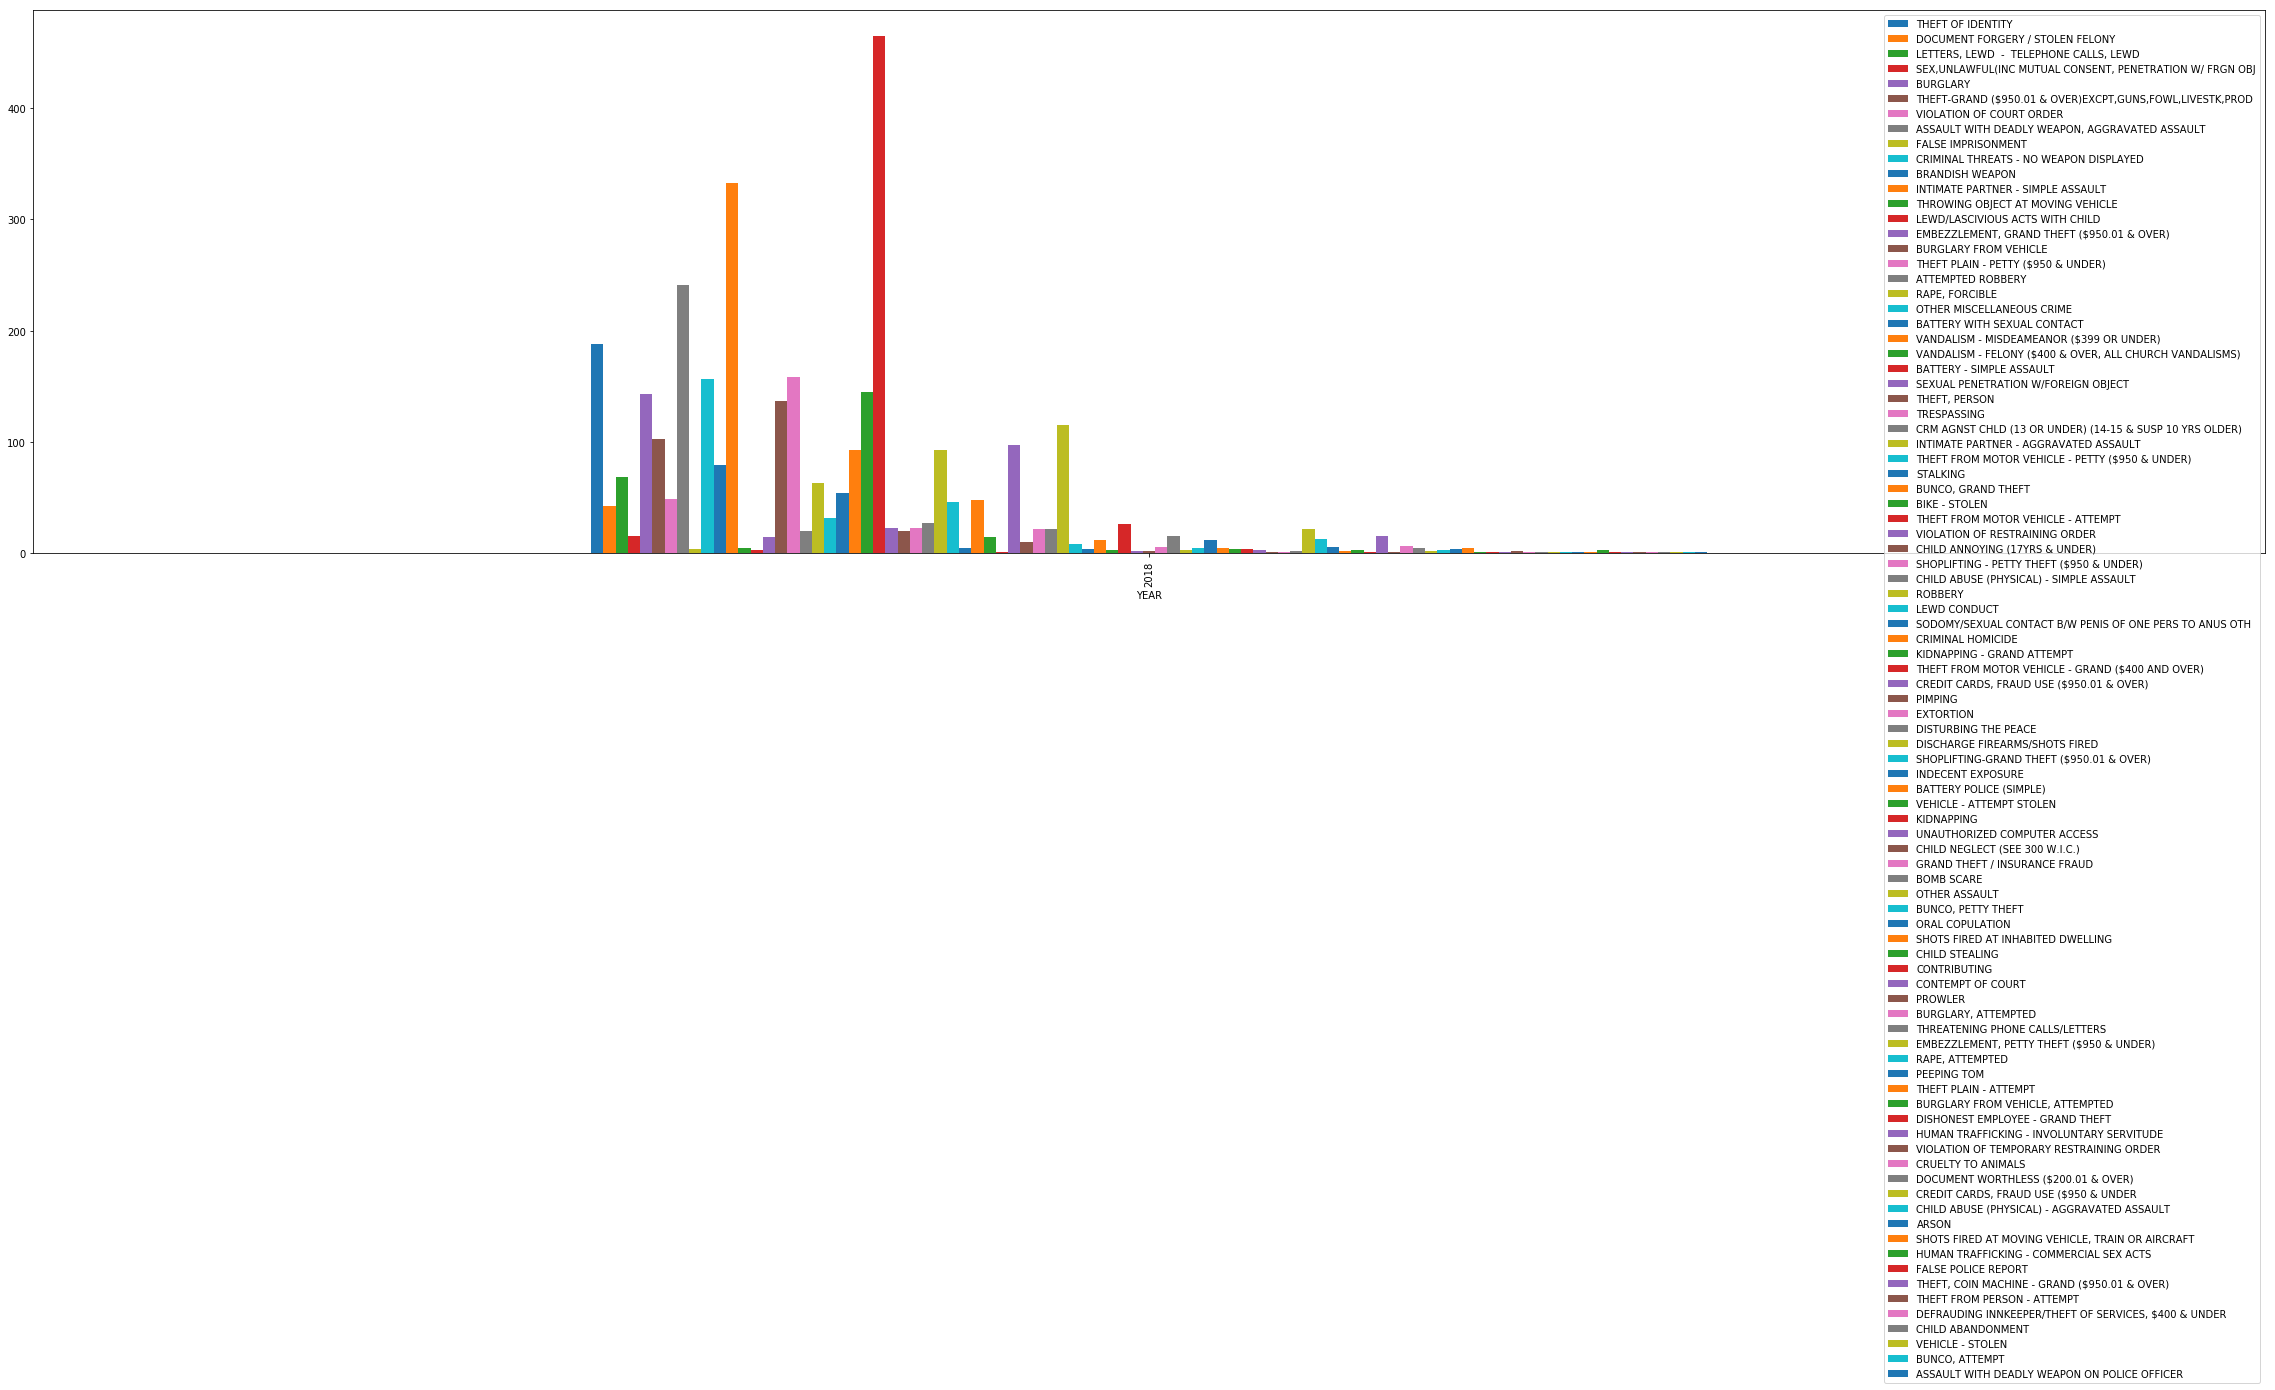

In [78]:
# our final graph for crime type in year of 2018
yearly_crime_2018.plot(x='YEAR', y=crime_type, figsize = (40, 10),kind = 'bar')

#### Create the 2018 victim age visualization

victims age in year 2018

In [79]:
age_crime_2018 = crime_2018

In [80]:
# Combined Crime code Description with 2018
age_crime_2018['Victim Age'] = age_crime_2018['Victim Age'].apply(group_age)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
age_crime_2018

Date Occurred  Time Occurred    Area Name  \
1038565          2018           1200   Hollenbeck   
1034563          2018            900  N Hollywood   
1041763          2018            900     Foothill   
1033483          2018           1000    Northeast   
1042077          2018           1200   Devonshire   
1040836          2018            700  77th Street   
1037414          2018           1200      Mission   
1019248          2018            800   Hollenbeck   
1034409          2018              1      Pacific   
1038002          2018            800      Rampart   
1039456          2018           1800     Wilshire   
1043016          2018           1200      Topanga   
1040253          2018           1200    Northeast   
1038778          2018           1300       Harbor   
1029976          2018           1600      West LA   
1036545          2018           1630    Southwest   
1033921          2018           1140       Newton   
1038163          2018           1140    Southwest   
1032325          2018           2200    Hollywood   
1036201          2018           1910      Topanga   
1031145          2018            730      Central   
1036742          2018           1000      West LA   
1030773          2018            130   Devonshire   
1030104          2018            900     Van Nuys   
1021040          2018           1500      West LA   
1033410          2018            615    Northeast   
1042575          2018            345      Olympic   
1037541          2018           2050      Topanga   
1037542          2018             30      Topanga   
1021058          2018           1730      West LA   
...               ...            ...          ...   
1042112          2018           1705    Southeast   
1032587          2018           1820     Wilshire   
1029835          2018           2024    Hollywood   
1021435          2018           1900     Van Nuys   
1029825          2018            130       Harbor   
934431           2018            910       Newton   
1030194          2018            900  West Valley   
1033913          2018           2120       Newton   
1030576          2018           2000       Newton   
1030470          2018            130  77th Street   
1032809          2018           1400      West LA   
1033000          2018            730     Van Nuys   
1032194          2018           1200       Harbor   
1032072          2018           1628   Hollenbeck   
1031599          2018           1730    Southwest   
1031141          2018           1100      Topanga   
1031079          2018           2315      Topanga   
1034225          2018           2030      Pacific   
1035504          2018           2130      Mission   
1035506          2018           1900      Mission   
1019290          2018           2100       Harbor   
1034511          2018            925  N Hollywood   
1034512          2018           1510  N Hollywood   
1034513          2018            920  N Hollywood   
1022582          2018           1200    Northeast   
1032590          2018           1800     Wilshire   
1022544          2018           1030    Northeast   
934412           2018            245       Newton   
1017396          2018           1800      Rampart   
1036658          2018              1       Harbor   

                                    Crime Code Description Victim Age  \
1038565                                  THEFT OF IDENTITY    30 - 40   
1034563                                  THEFT OF IDENTITY    50 - 60   
1041763                   DOCUMENT FORGERY / STOLEN FELONY    60 - 70   
1033483                                  THEFT OF IDENTITY    40 - 50   
1042077                                  THEFT OF IDENTITY    50 - 60   
1040836            LETTERS, LEWD  -  TELEPHONE CALLS, LEWD    21 - 30   
1037414  SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W...    11 - 20   
1019248                                           BURGLARY    60 - 70   
1034409                                  THEFT OF IDENTITY    60

In [82]:
# sort the ages of victims
age_crime_2018 = age_crime_2018.sort_values(by= ['Victim Age'])

In [83]:
# combined Crime code Description with Victim Age in 2018
age_crime_2018.groupby(['Victim Age', 'Crime Code Description']).size()

Victim Age  Crime Code Description                                  
0 - 10      BATTERY - SIMPLE ASSAULT                                     2
            BATTERY WITH SEXUAL CONTACT                                  1
            CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                      3
            CHILD ANNOYING (17YRS & UNDER)                               1
            CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)     1
11 - 20     ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              30
            ATTEMPTED ROBBERY                                            3
            BATTERY - SIMPLE ASSAULT                                    42
            BATTERY WITH SEXUAL CONTACT                                 19
            BIKE - STOLEN                                                1
            BRANDISH WEAPON                                              7
            BUNCO, GRAND THEFT                                           3
            BUNCO, PETTY THEFT 

In [84]:
crime_type.append("Victim Age")

In [85]:
# create a new table name victim_age_crime_2018 to have both crime code description and year of 2018
victim_age_crime_2018 = pd.DataFrame(columns = crime_type)

In [86]:
# check the columns
victim_age_crime_2018

Empty DataFrame
Columns: [THEFT OF IDENTITY, DOCUMENT FORGERY / STOLEN FELONY, LETTERS, LEWD  -  TELEPHONE CALLS, LEWD, SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ, BURGLARY, THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD, VIOLATION OF COURT ORDER, ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, FALSE IMPRISONMENT, CRIMINAL THREATS - NO WEAPON DISPLAYED, BRANDISH WEAPON, INTIMATE PARTNER - SIMPLE ASSAULT, THROWING OBJECT AT MOVING VEHICLE, LEWD/LASCIVIOUS ACTS WITH CHILD, EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER), BURGLARY FROM VEHICLE, THEFT PLAIN - PETTY ($950 & UNDER), ATTEMPTED ROBBERY, RAPE, FORCIBLE, OTHER MISCELLANEOUS CRIME, BATTERY WITH SEXUAL CONTACT, VANDALISM - MISDEAMEANOR ($399 OR UNDER), VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), BATTERY - SIMPLE ASSAULT, SEXUAL PENETRATION W/FOREIGN OBJECT, THEFT, PERSON, TRESPASSING, CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER), INTIMATE PARTNER - AGGRAVATED ASSAULT, THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), STALKING, BUNCO, GRAND THEFT, BIKE - STOLEN, THEFT FROM MOTOR VEHICLE - ATTEMPT, VIOLATION OF RESTRAINING ORDER, CHILD ANNOYING (17YRS & UNDER), SHOPLIFTING - PETTY THEFT ($950 & UNDER), CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT, ROBBERY, LEWD CONDUCT, SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH, CRIMINAL HOMICIDE, KIDNAPPING - GRAND ATTEMPT, THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER), CREDIT CARDS, FRAUD USE ($950.01 & OVER), PIMPING, EXTORTION, DISTURBING THE PEACE, DISCHARGE FIREARMS/SHOTS FIRED, SHOPLIFTING-GRAND THEFT ($950.01 & OVER), INDECENT EXPOSURE, BATTERY POLICE (SIMPLE), VEHICLE - ATTEMPT STOLEN, KIDNAPPING, UNAUTHORIZED COMPUTER ACCESS, CHILD NEGLECT (SEE 300 W.I.C.), GRAND THEFT / INSURANCE FRAUD, BOMB SCARE, OTHER ASSAULT, BUNCO, PETTY THEFT, ORAL COPULATION, SHOTS FIRED AT INHABITED DWELLING, CHILD STEALING, CONTRIBUTING, CONTEMPT OF COURT, PROWLER, BURGLARY, ATTEMPTED, THREATENING PHONE CALLS/LETTERS, EMBEZZLEMENT, PETTY THEFT ($950 & UNDER), RAPE, ATTEMPTED, PEEPING TOM, THEFT PLAIN - ATTEMPT, BURGLARY FROM VEHICLE, ATTEMPTED, DISHONEST EMPLOYEE - GRAND THEFT, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, VIOLATION OF TEMPORARY RESTRAINING ORDER, CRUELTY TO ANIMALS, DOCUMENT WORTHLESS ($200.01 & OVER), CREDIT CARDS, FRAUD USE ($950 & UNDER, CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT, ARSON, SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT, HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, FALSE POLICE REPORT, THEFT, COIN MACHINE - GRAND ($950.01 & OVER), THEFT FROM PERSON - ATTEMPT, DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER, CHILD ABANDONMENT, VEHICLE - STOLEN, BUNCO, ATTEMPT, ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER, Victim Age]
Index: []

[0 rows x 92 columns]

In [87]:
# create a new table based on a crime age
age_group_2018 = age_crime_2018['Victim Age'].unique().tolist()

In [ ]:
using for each loop to adding data into age_group_2018 table and name this new table as yvictim_age_crime_2018

In [88]:
for i in range(0, len(age_group_2018)):
    temp = age_crime_2018[age_crime_2018['Victim Age'] == age_group_2018[i]]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(age_group_2018[i])
    victim_age_crime_2018.loc[i] = crime_count

In [89]:
victim_age_crime_2018

THEFT OF IDENTITY DOCUMENT FORGERY / STOLEN FELONY  \
0                 0                                0   
1                 4                                3   
2                39                                4   
3                35                                8   
4                46                                8   
5                30                                3   
6                21                                5   
7                11                                5   
8                 1                                7   
9                 1                                0   

  LETTERS, LEWD  -  TELEPHONE CALLS, LEWD  \
0                                       0   
1                                       5   
2                                      31   
3                                      11   
4                                      16   
5                                       5   
6                                       1   
7                                       0   
8                                       0   
9                                       0   

  SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ BURGLARY  \
0                                                  0              0   
1                                                 16              3   
2                                                  0             23   
3                                                  0             45   
4                                                  0             25   
5                                                  0             24   
6                                                  0             14   
7                                                  0              6   
8                                                  0              1   
9                                                  0              2   

  THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD  \
0                                                  0         
1                                                  5         
2                                                 18         
3                                                 22         
4                                                 18         
5                                                 19         
6                                                 15         
7                                                  2         
8                                                  2         
9                                                  2         

  VIOLATION OF COURT ORDER ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  \
0                        0                                              0   
1                        3                                             30   
2                        7                                             71   
3                       20                                             43   
4                        7                                             34   
5                        7                                             46   
6                        3                                             13   
7                        1                                              4   
8                        1                                              0   
9                        0                                              0   

  FALSE IMPRISONMENT CRIMINAL THREATS - NO WEAPON DISPLAYED    ...      \
0                  0                                      0    ...       
1                  0                                     10    ...       
2                  1                                     37    ...       
3                  2                                     39    ...       
4                  1                                     36    ...       
5                  0                                     21    ...       
6                  0                                      

In [90]:
crime_type.pop()

'Victim Age'

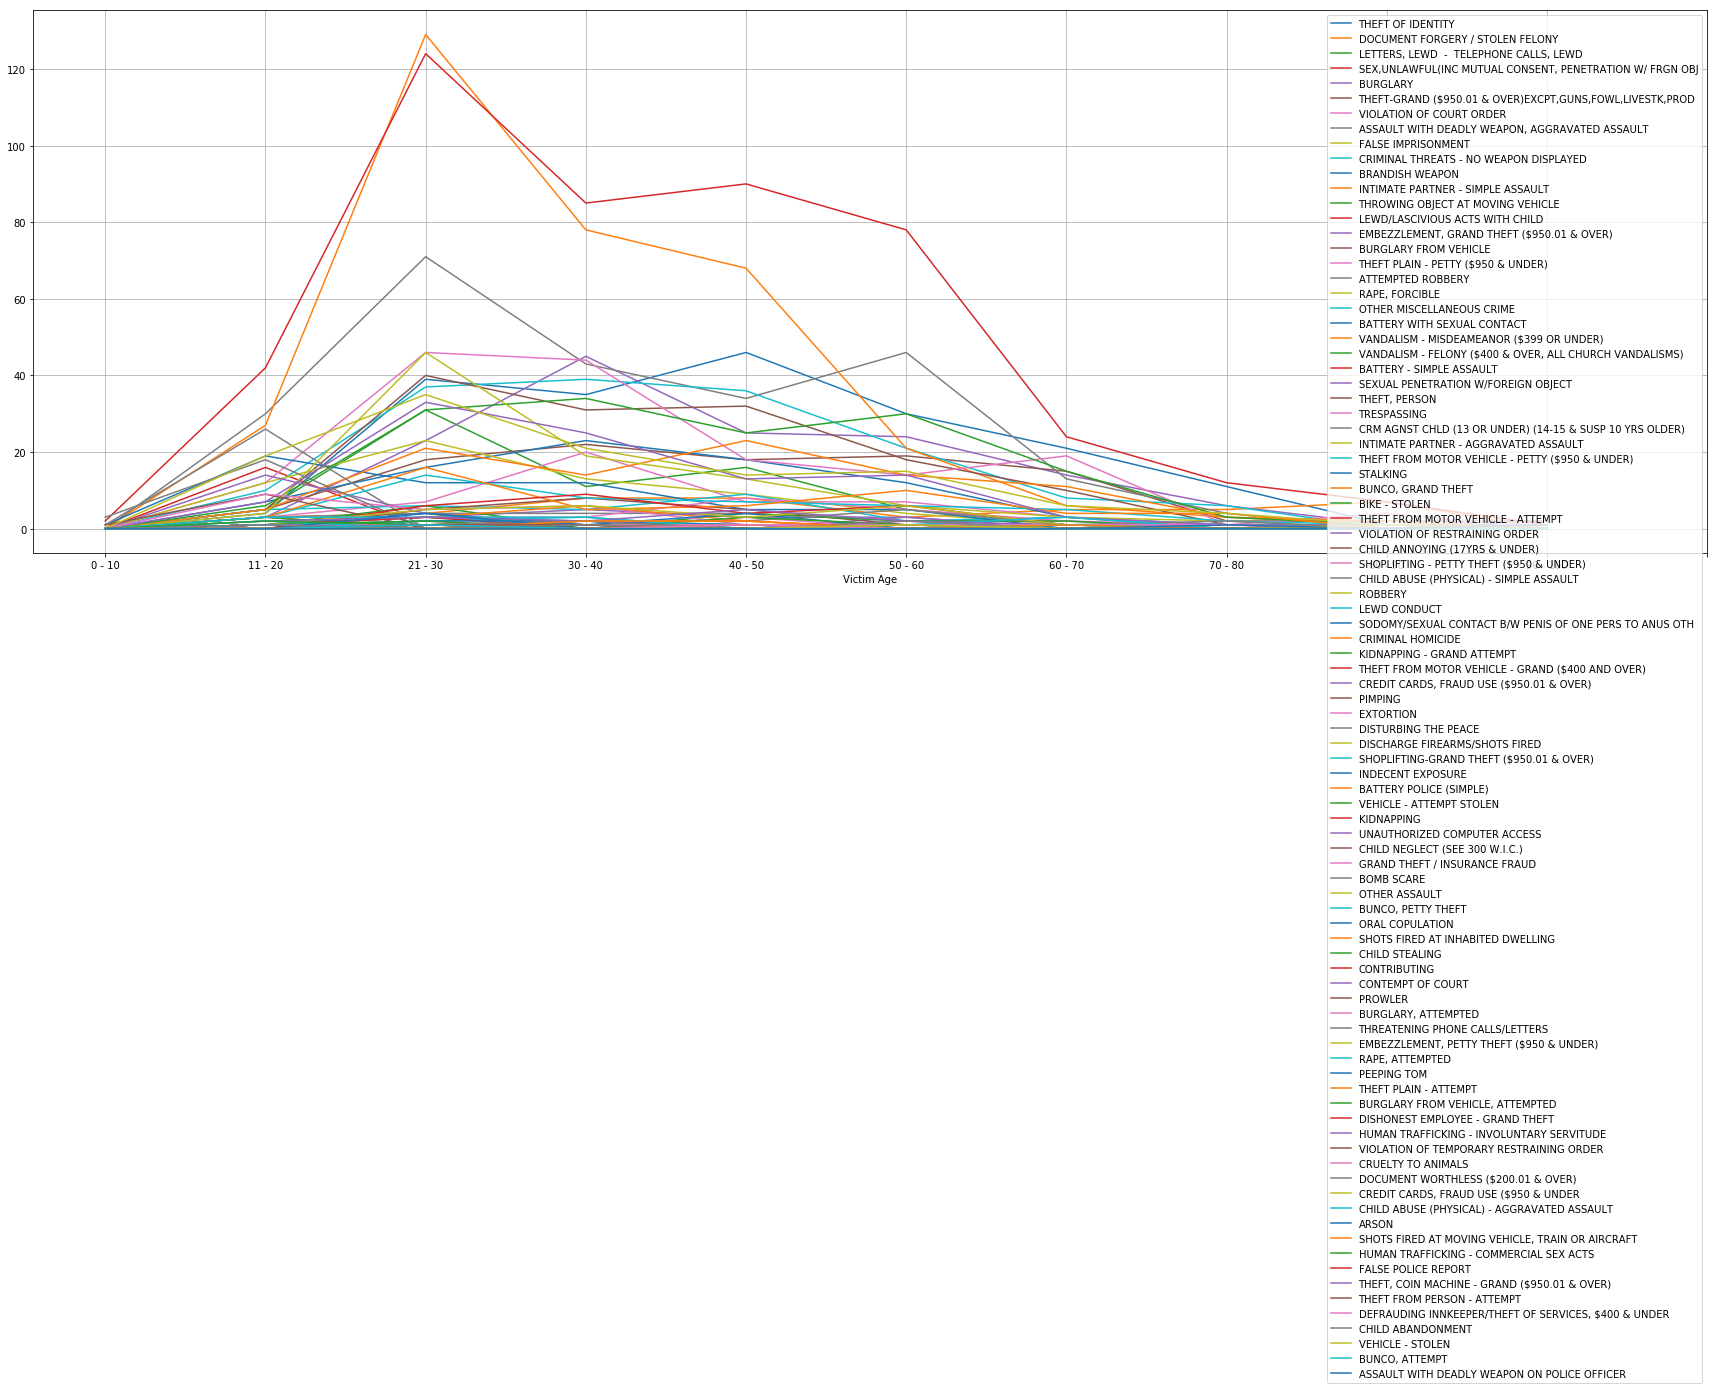

In [91]:
# our final graph based on age in 2018
victim_age_crime_2018.plot(x='Victim Age', y=crime_type, figsize=(30,10), xticks=(range(0,11)), grid=True)

#### Create the 2018 Area Name Visualization

Create a new table for area of crimes on 2018

In [92]:
# create a temp variable 
area_crime_2018 = crime_2018

In [93]:
# sort them based on the area
area_crime_2018 = area_crime_2018.sort_values(by= ['Area Name'])

In [94]:
# combined Crime code Description with area in 2018
area_crime_2018.groupby(['Area Name', 'Crime Code Description']).size()

Area Name    Crime Code Description                                  
77th Street  ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT              29
             ATTEMPTED ROBBERY                                            1
             BATTERY - SIMPLE ASSAULT                                    41
             BATTERY WITH SEXUAL CONTACT                                  1
             BRANDISH WEAPON                                              7
             BUNCO, GRAND THEFT                                           2
             BUNCO, PETTY THEFT                                           1
             BURGLARY                                                     3
             BURGLARY FROM VEHICLE                                        2
             BURGLARY, ATTEMPTED                                          1
             CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT                  1
             CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT                      3
             CHILD

In [95]:
crime_type.append("Area Name")

In [96]:
# create a new table name area_name_crime_2018 to have both crime code description and area in 2018
area_name_crime_2018 = pd.DataFrame(columns = crime_type)

In [97]:
# check columns
area_name_crime_2018

Empty DataFrame
Columns: [THEFT OF IDENTITY, DOCUMENT FORGERY / STOLEN FELONY, LETTERS, LEWD  -  TELEPHONE CALLS, LEWD, SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ, BURGLARY, THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD, VIOLATION OF COURT ORDER, ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, FALSE IMPRISONMENT, CRIMINAL THREATS - NO WEAPON DISPLAYED, BRANDISH WEAPON, INTIMATE PARTNER - SIMPLE ASSAULT, THROWING OBJECT AT MOVING VEHICLE, LEWD/LASCIVIOUS ACTS WITH CHILD, EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER), BURGLARY FROM VEHICLE, THEFT PLAIN - PETTY ($950 & UNDER), ATTEMPTED ROBBERY, RAPE, FORCIBLE, OTHER MISCELLANEOUS CRIME, BATTERY WITH SEXUAL CONTACT, VANDALISM - MISDEAMEANOR ($399 OR UNDER), VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), BATTERY - SIMPLE ASSAULT, SEXUAL PENETRATION W/FOREIGN OBJECT, THEFT, PERSON, TRESPASSING, CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER), INTIMATE PARTNER - AGGRAVATED ASSAULT, THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), STALKING, BUNCO, GRAND THEFT, BIKE - STOLEN, THEFT FROM MOTOR VEHICLE - ATTEMPT, VIOLATION OF RESTRAINING ORDER, CHILD ANNOYING (17YRS & UNDER), SHOPLIFTING - PETTY THEFT ($950 & UNDER), CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT, ROBBERY, LEWD CONDUCT, SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH, CRIMINAL HOMICIDE, KIDNAPPING - GRAND ATTEMPT, THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER), CREDIT CARDS, FRAUD USE ($950.01 & OVER), PIMPING, EXTORTION, DISTURBING THE PEACE, DISCHARGE FIREARMS/SHOTS FIRED, SHOPLIFTING-GRAND THEFT ($950.01 & OVER), INDECENT EXPOSURE, BATTERY POLICE (SIMPLE), VEHICLE - ATTEMPT STOLEN, KIDNAPPING, UNAUTHORIZED COMPUTER ACCESS, CHILD NEGLECT (SEE 300 W.I.C.), GRAND THEFT / INSURANCE FRAUD, BOMB SCARE, OTHER ASSAULT, BUNCO, PETTY THEFT, ORAL COPULATION, SHOTS FIRED AT INHABITED DWELLING, CHILD STEALING, CONTRIBUTING, CONTEMPT OF COURT, PROWLER, BURGLARY, ATTEMPTED, THREATENING PHONE CALLS/LETTERS, EMBEZZLEMENT, PETTY THEFT ($950 & UNDER), RAPE, ATTEMPTED, PEEPING TOM, THEFT PLAIN - ATTEMPT, BURGLARY FROM VEHICLE, ATTEMPTED, DISHONEST EMPLOYEE - GRAND THEFT, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, VIOLATION OF TEMPORARY RESTRAINING ORDER, CRUELTY TO ANIMALS, DOCUMENT WORTHLESS ($200.01 & OVER), CREDIT CARDS, FRAUD USE ($950 & UNDER, CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT, ARSON, SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT, HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, FALSE POLICE REPORT, THEFT, COIN MACHINE - GRAND ($950.01 & OVER), THEFT FROM PERSON - ATTEMPT, DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER, CHILD ABANDONMENT, VEHICLE - STOLEN, BUNCO, ATTEMPT, ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER, Area Name]
Index: []

[0 rows x 92 columns]

In [98]:
# create a new table based on a crime area
area_group_2018 = area_crime_2018['Area Name'].unique().tolist()

In [ ]:
using for each loop to adding data into area_group_2018 table and name this new table as area_name_crime_2018

In [99]:
for i in range(0, len(area_group_2018)):
    temp = area_crime_2018[area_crime_2018['Area Name'] == area_group_2018[i]]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(area_group_2018[i])
    area_name_crime_2018.loc[i] = crime_count

In [100]:
area_name_crime_2018

THEFT OF IDENTITY DOCUMENT FORGERY / STOLEN FELONY  \
0                  6                                0   
1                  3                                2   
2                 12                                2   
3                 12                                1   
4                  5                                2   
5                  8                                0   
6                  6                                0   
7                 11                                3   
8                 16                                5   
9                  6                                1   
10                14                                0   
11                 3                                1   
12                17                                0   
13                 4                                1   
14                 7                                3   
15                12                                3   
16                 9                                6   
17                13                                2   
18                 7                                9   
19                 8                                1   
20                 9                                1   

   LETTERS, LEWD  -  TELEPHONE CALLS, LEWD  \
0                                        5   
1                                        3   
2                                        4   
3                                        2   
4                                        1   
5                                        4   
6                                        1   
7                                        4   
8                                        1   
9                                        3   
10                                       7   
11                                       2   
12                                       1   
13                                       6   
14                                       0   
15                                       5   
16                                       4   
17                                       1   
18                                       7   
19                                       2   
20                                       6   

   SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ BURGLARY  \
0                                                   0              3   
1                                                   0             10   
2                                                   0              8   
3                                                   0              3   
4                                                   0              7   
5                                                   0              1   
6                                                   0              3   
7                                                   2              9   
8                                                   1             10   
9                                                   1              8   
10                                                  1             15   
11                                                  2              7   
12                                                  0              4   
13                                                  0             10   
14                                                  0              4   
15                                                  2              6   
16                                                  2              8   
17                                                  0              2   
18                                                  1             10   
19                                                  3              4   
20                                                  1             11   

   THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD  \
0                                                   5         
1                       

In [101]:
crime_type.pop()

'Area Name'

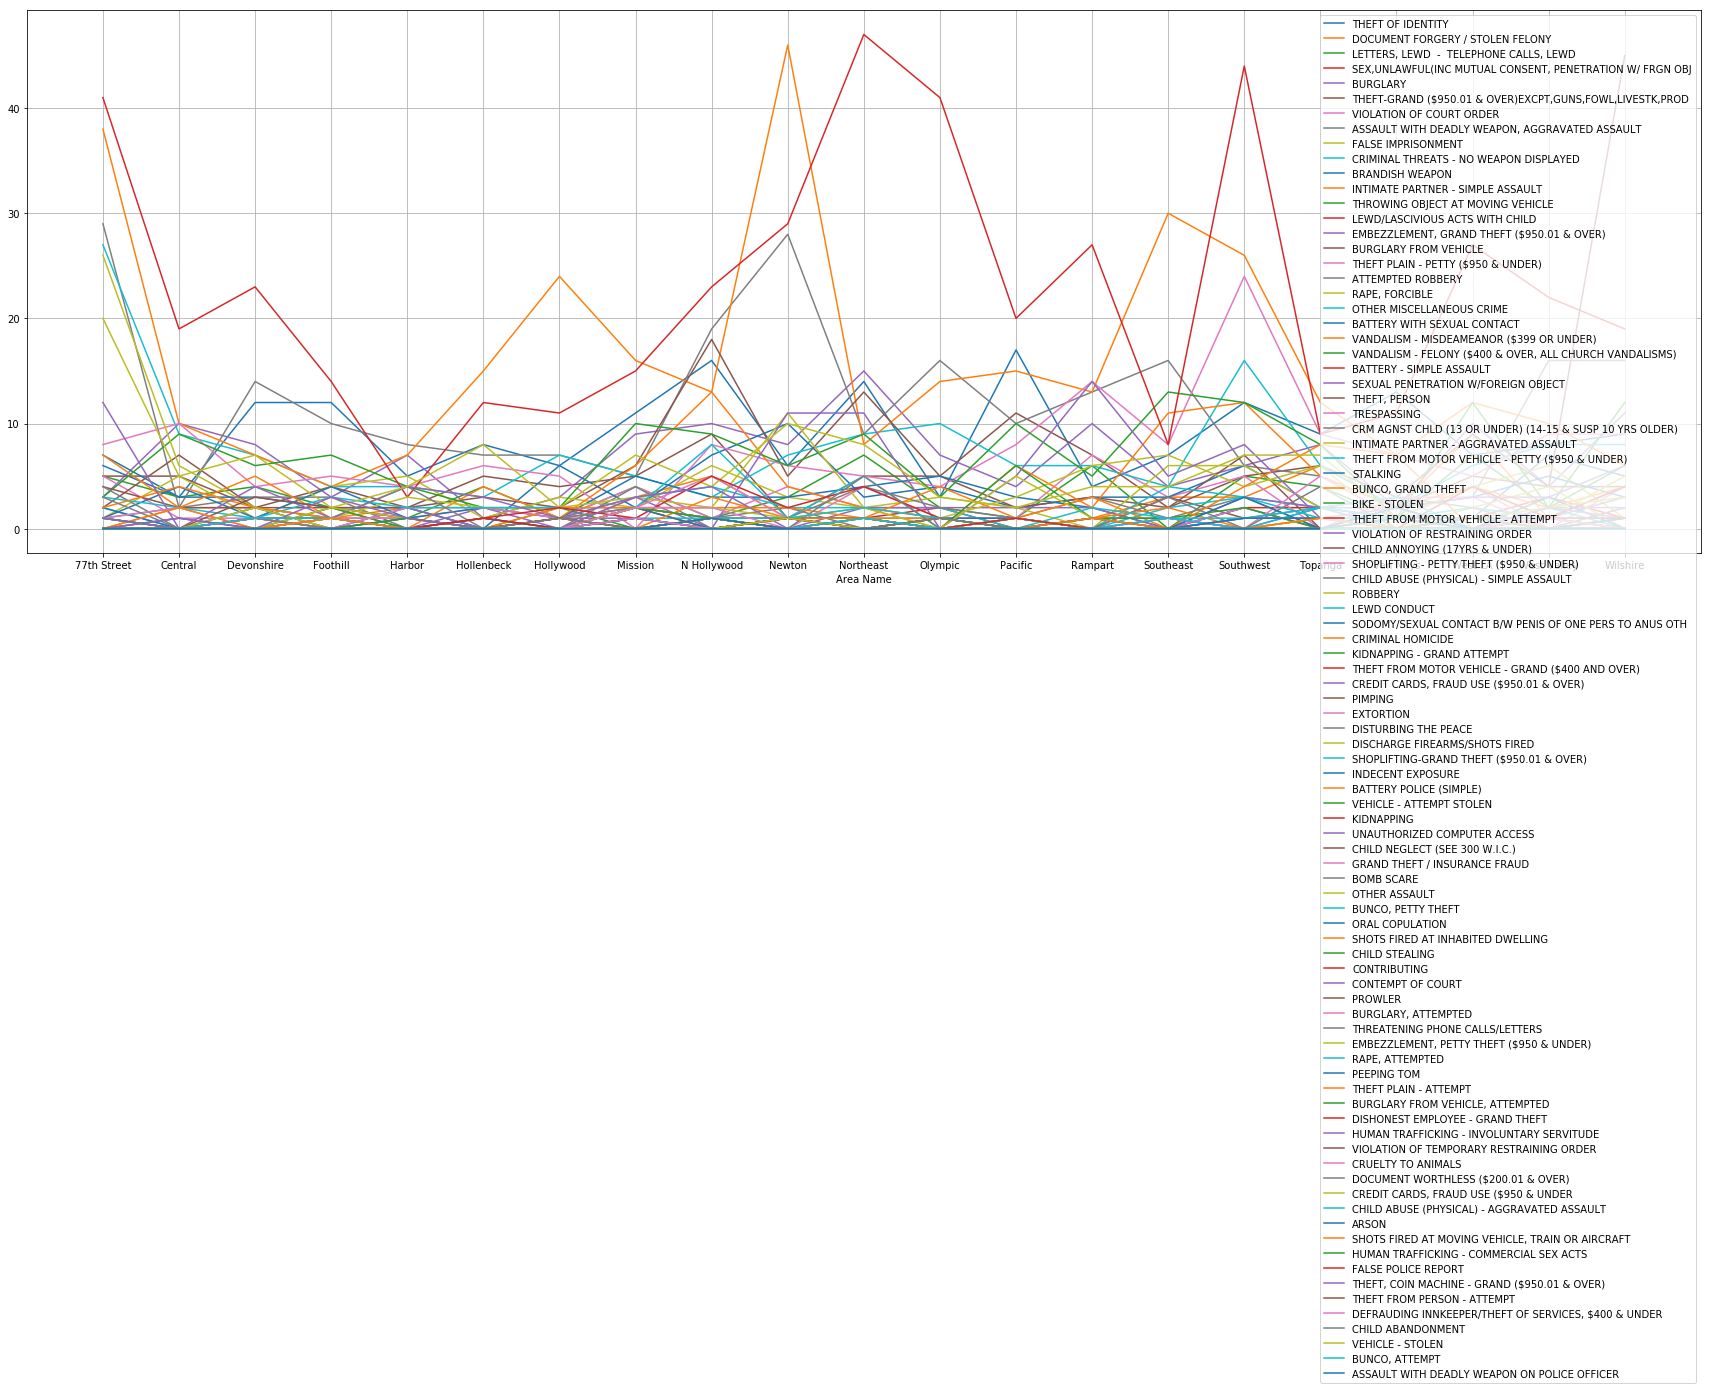

In [102]:
# our final graph based on area in 2018
area_name_crime_2018.plot(x='Area Name', y=crime_type, figsize=(30,10), xticks=(range(0,21)), grid=True)

#### Create 2018 Victim Gender Visualization

Create a new table for gender of victims on 2018

In [103]:
gender_table_2018 = crime_2018

In [104]:
# combined Crime code Description with Victim Sex in 2018
gender_table_2018.groupby(['Victim Sex', 'Crime Code Description']).size()

Victim Sex  Crime Code Description                                  
F           ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               68
            ATTEMPTED ROBBERY                                             5
            BATTERY - SIMPLE ASSAULT                                    236
            BATTERY WITH SEXUAL CONTACT                                  50
            BIKE - STOLEN                                                 8
            BOMB SCARE                                                    1
            BRANDISH WEAPON                                              34
            BUNCO, ATTEMPT                                                1
            BUNCO, GRAND THEFT                                           22
            BUNCO, PETTY THEFT                                            9
            BURGLARY                                                     55
            BURGLARY FROM VEHICLE                                        65
            BURGLAR

In [105]:
crime_type.append("Victim Sex")

In [106]:
# create a new table name victim_gender_crime_2018 to have both crime code description and Victim Sex in 2018
victim_gender_crime_2018 = pd.DataFrame(columns = crime_type)

In [107]:
# check columns
victim_gender_crime_2018

Empty DataFrame
Columns: [THEFT OF IDENTITY, DOCUMENT FORGERY / STOLEN FELONY, LETTERS, LEWD  -  TELEPHONE CALLS, LEWD, SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ, BURGLARY, THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD, VIOLATION OF COURT ORDER, ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, FALSE IMPRISONMENT, CRIMINAL THREATS - NO WEAPON DISPLAYED, BRANDISH WEAPON, INTIMATE PARTNER - SIMPLE ASSAULT, THROWING OBJECT AT MOVING VEHICLE, LEWD/LASCIVIOUS ACTS WITH CHILD, EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER), BURGLARY FROM VEHICLE, THEFT PLAIN - PETTY ($950 & UNDER), ATTEMPTED ROBBERY, RAPE, FORCIBLE, OTHER MISCELLANEOUS CRIME, BATTERY WITH SEXUAL CONTACT, VANDALISM - MISDEAMEANOR ($399 OR UNDER), VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), BATTERY - SIMPLE ASSAULT, SEXUAL PENETRATION W/FOREIGN OBJECT, THEFT, PERSON, TRESPASSING, CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER), INTIMATE PARTNER - AGGRAVATED ASSAULT, THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), STALKING, BUNCO, GRAND THEFT, BIKE - STOLEN, THEFT FROM MOTOR VEHICLE - ATTEMPT, VIOLATION OF RESTRAINING ORDER, CHILD ANNOYING (17YRS & UNDER), SHOPLIFTING - PETTY THEFT ($950 & UNDER), CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT, ROBBERY, LEWD CONDUCT, SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH, CRIMINAL HOMICIDE, KIDNAPPING - GRAND ATTEMPT, THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER), CREDIT CARDS, FRAUD USE ($950.01 & OVER), PIMPING, EXTORTION, DISTURBING THE PEACE, DISCHARGE FIREARMS/SHOTS FIRED, SHOPLIFTING-GRAND THEFT ($950.01 & OVER), INDECENT EXPOSURE, BATTERY POLICE (SIMPLE), VEHICLE - ATTEMPT STOLEN, KIDNAPPING, UNAUTHORIZED COMPUTER ACCESS, CHILD NEGLECT (SEE 300 W.I.C.), GRAND THEFT / INSURANCE FRAUD, BOMB SCARE, OTHER ASSAULT, BUNCO, PETTY THEFT, ORAL COPULATION, SHOTS FIRED AT INHABITED DWELLING, CHILD STEALING, CONTRIBUTING, CONTEMPT OF COURT, PROWLER, BURGLARY, ATTEMPTED, THREATENING PHONE CALLS/LETTERS, EMBEZZLEMENT, PETTY THEFT ($950 & UNDER), RAPE, ATTEMPTED, PEEPING TOM, THEFT PLAIN - ATTEMPT, BURGLARY FROM VEHICLE, ATTEMPTED, DISHONEST EMPLOYEE - GRAND THEFT, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, VIOLATION OF TEMPORARY RESTRAINING ORDER, CRUELTY TO ANIMALS, DOCUMENT WORTHLESS ($200.01 & OVER), CREDIT CARDS, FRAUD USE ($950 & UNDER, CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT, ARSON, SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT, HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, FALSE POLICE REPORT, THEFT, COIN MACHINE - GRAND ($950.01 & OVER), THEFT FROM PERSON - ATTEMPT, DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER, CHILD ABANDONMENT, VEHICLE - STOLEN, BUNCO, ATTEMPT, ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER, Victim Sex]
Index: []

[0 rows x 92 columns]

In [108]:
# create a new table call gender_group_2018 based on a gender type
gender_group_2018 = gender_table_2018['Victim Sex'].unique().tolist()

using for each loop to adding data into gender_group_2018 table and name this new table as victim_gender_crime_2018

In [109]:
for i in range(0, len(gender_group_2018)):
    temp = gender_table_2018[gender_table_2018['Victim Sex'] == gender_group_2018[i]]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(gender_group_2018[i])
    victim_gender_crime_2018.loc[i] = crime_count

In [110]:
crime_type.pop()

'Victim Sex'

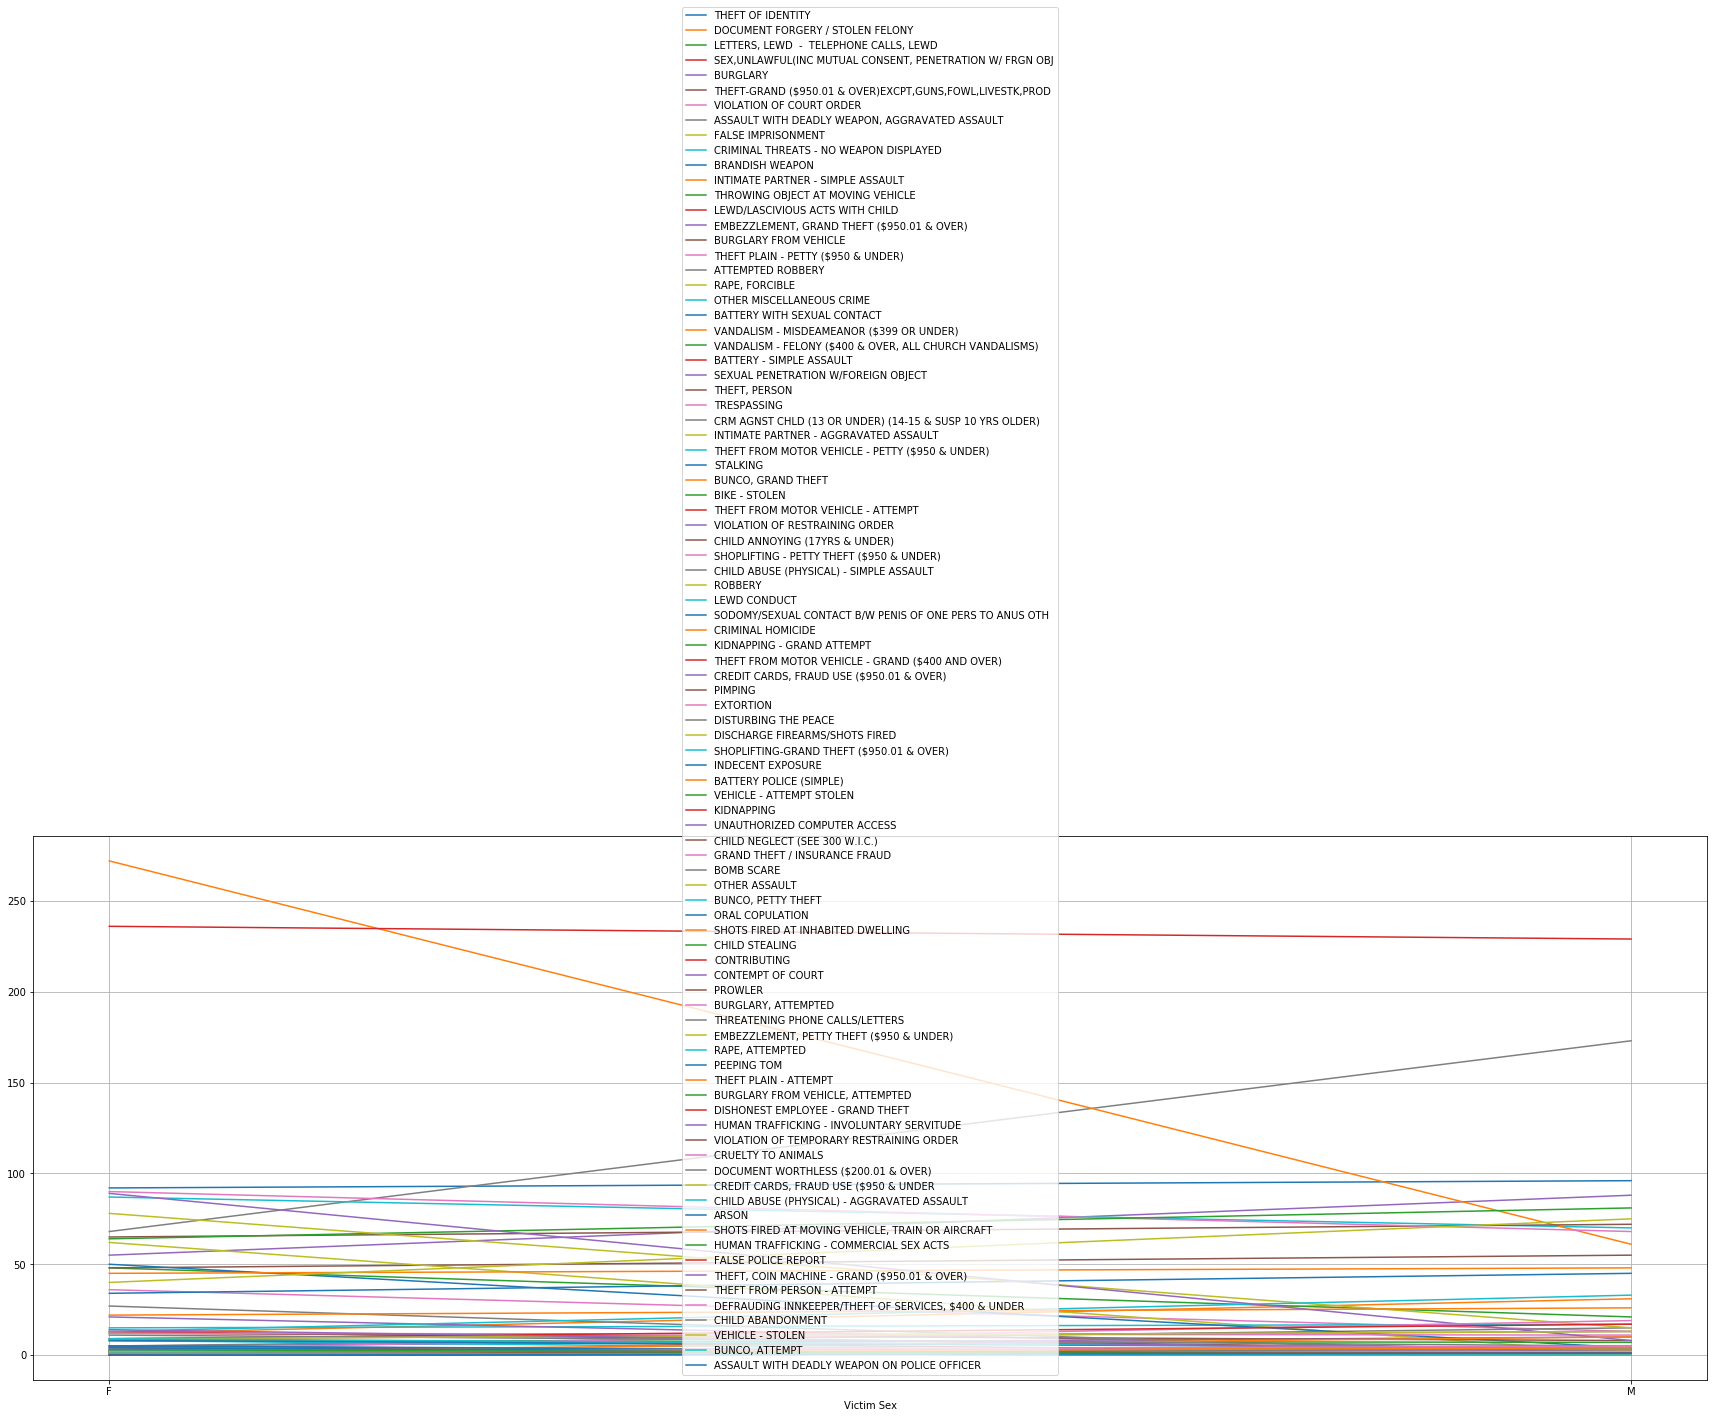

In [111]:
# final graph for gender of victims in 2018
victim_gender_crime_2018.plot(x='Victim Sex', y=crime_type, figsize=(30,10), xticks=(range(0,2)), grid=True)

#### Create Victim Descent Visualization

Create a new table for Victim Descent on 2018

In [112]:
descent_table_2018 = crime_2018

In [113]:
# combined Crime code Description with Victim Descent in 2018
descent_table_2018.groupby(['Victim Descent', 'Crime Code Description']).size()

Victim Descent  Crime Code Description                                  
A               ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT               4
                BATTERY - SIMPLE ASSAULT                                    13
                BATTERY WITH SEXUAL CONTACT                                  1
                BIKE - STOLEN                                                1
                BRANDISH WEAPON                                              3
                BUNCO, GRAND THEFT                                           6
                BUNCO, PETTY THEFT                                           1
                BURGLARY                                                    10
                BURGLARY FROM VEHICLE                                       14
                BURGLARY FROM VEHICLE, ATTEMPTED                             1
                CREDIT CARDS, FRAUD USE ($950 & UNDER                        1
                CRIMINAL THREATS - NO WEAPON DISPLAYED    

In [114]:
crime_type.append("Victim Descent")

In [115]:
# create a new table name victim_descent_crime_2018 to have both crime code description and Victim descent in 2018
victim_descent_crime_2018 = pd.DataFrame(columns = crime_type)

In [116]:
# check columns
victim_descent_crime_2018

Empty DataFrame
Columns: [THEFT OF IDENTITY, DOCUMENT FORGERY / STOLEN FELONY, LETTERS, LEWD  -  TELEPHONE CALLS, LEWD, SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ, BURGLARY, THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD, VIOLATION OF COURT ORDER, ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT, FALSE IMPRISONMENT, CRIMINAL THREATS - NO WEAPON DISPLAYED, BRANDISH WEAPON, INTIMATE PARTNER - SIMPLE ASSAULT, THROWING OBJECT AT MOVING VEHICLE, LEWD/LASCIVIOUS ACTS WITH CHILD, EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER), BURGLARY FROM VEHICLE, THEFT PLAIN - PETTY ($950 & UNDER), ATTEMPTED ROBBERY, RAPE, FORCIBLE, OTHER MISCELLANEOUS CRIME, BATTERY WITH SEXUAL CONTACT, VANDALISM - MISDEAMEANOR ($399 OR UNDER), VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS), BATTERY - SIMPLE ASSAULT, SEXUAL PENETRATION W/FOREIGN OBJECT, THEFT, PERSON, TRESPASSING, CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER), INTIMATE PARTNER - AGGRAVATED ASSAULT, THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER), STALKING, BUNCO, GRAND THEFT, BIKE - STOLEN, THEFT FROM MOTOR VEHICLE - ATTEMPT, VIOLATION OF RESTRAINING ORDER, CHILD ANNOYING (17YRS & UNDER), SHOPLIFTING - PETTY THEFT ($950 & UNDER), CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT, ROBBERY, LEWD CONDUCT, SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH, CRIMINAL HOMICIDE, KIDNAPPING - GRAND ATTEMPT, THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER), CREDIT CARDS, FRAUD USE ($950.01 & OVER), PIMPING, EXTORTION, DISTURBING THE PEACE, DISCHARGE FIREARMS/SHOTS FIRED, SHOPLIFTING-GRAND THEFT ($950.01 & OVER), INDECENT EXPOSURE, BATTERY POLICE (SIMPLE), VEHICLE - ATTEMPT STOLEN, KIDNAPPING, UNAUTHORIZED COMPUTER ACCESS, CHILD NEGLECT (SEE 300 W.I.C.), GRAND THEFT / INSURANCE FRAUD, BOMB SCARE, OTHER ASSAULT, BUNCO, PETTY THEFT, ORAL COPULATION, SHOTS FIRED AT INHABITED DWELLING, CHILD STEALING, CONTRIBUTING, CONTEMPT OF COURT, PROWLER, BURGLARY, ATTEMPTED, THREATENING PHONE CALLS/LETTERS, EMBEZZLEMENT, PETTY THEFT ($950 & UNDER), RAPE, ATTEMPTED, PEEPING TOM, THEFT PLAIN - ATTEMPT, BURGLARY FROM VEHICLE, ATTEMPTED, DISHONEST EMPLOYEE - GRAND THEFT, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, VIOLATION OF TEMPORARY RESTRAINING ORDER, CRUELTY TO ANIMALS, DOCUMENT WORTHLESS ($200.01 & OVER), CREDIT CARDS, FRAUD USE ($950 & UNDER, CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT, ARSON, SHOTS FIRED AT MOVING VEHICLE, TRAIN OR AIRCRAFT, HUMAN TRAFFICKING - COMMERCIAL SEX ACTS, FALSE POLICE REPORT, THEFT, COIN MACHINE - GRAND ($950.01 & OVER), THEFT FROM PERSON - ATTEMPT, DEFRAUDING INNKEEPER/THEFT OF SERVICES, $400 & UNDER, CHILD ABANDONMENT, VEHICLE - STOLEN, BUNCO, ATTEMPT, ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER, Victim Descent]
Index: []

[0 rows x 92 columns]

In [117]:
# create a new table name descent_group_2018 based on a Victim Descent
descent_group_2018 = descent_table_2018['Victim Descent'].unique().tolist()

using for each loop to adding data into descent_group_2018 table and name this new table as victim_descent_crime_2018

In [118]:
for i in range(0, len(descent_group_2018)):
    temp = descent_table_2018[descent_table_2018['Victim Descent'] == descent_group_2018[i]]
    crime_count = []
    for j in range(0, len(crime_type) - 1):
        crime_count.append(len(temp[temp['Crime Code Description'] == crime_type[j]]))
    crime_count.append(descent_group_2018[i])
    victim_descent_crime_2018.loc[i] = crime_count

In [119]:
victim_descent_crime_2018

THEFT OF IDENTITY DOCUMENT FORGERY / STOLEN FELONY  \
0                 70                               19   
1                 59                               13   
2                 19                                4   
3                 29                                4   
4                  2                                1   
5                  0                                0   
6                  2                                1   
7                  7                                1   
8                  0                                0   
9                  0                                0   
10                 0                                0   

   LETTERS, LEWD  -  TELEPHONE CALLS, LEWD  \
0                                       16   
1                                       27   
2                                       11   
3                                       15   
4                                        0   
5                                        0   
6                                        0   
7                                        0   
8                                        0   
9                                        0   
10                                       0   

   SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ BURGLARY  \
0                                                   1             44   
1                                                  12             40   
2                                                   1             26   
3                                                   2             19   
4                                                   0              2   
5                                                   0              0   
6                                                   0              2   
7                                                   0             10   
8                                                   0              0   
9                                                   0              0   
10                                                  0              0   

   THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD  \
0                                                  44         
1                                                  25         
2                                                  16         
3                                                  13         
4                                                   2         
5                                                   0         
6                                                   0         
7                                                   3         
8                                                   0         
9                                                   0         
10                                                  0         

   VIOLATION OF COURT ORDER ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT  \
0                        10                                             35   
1                        25                                            116   
2                         2                                             22   
3                        12                                             62   
4                         0                                              0   
5                         0                                              0   
6                         0                                              2   
7                         0                                              4   
8                         0                                              0   
9                         0                                              0   
10                        0                                              0   

   FALSE IMPRISONMENT CRIMINAL THREATS - NO WEAPON DISPLAYED      ...        \
0                   2                                     25      ...         
1                   2                           

In [120]:
crime_type.pop()

'Victim Descent'

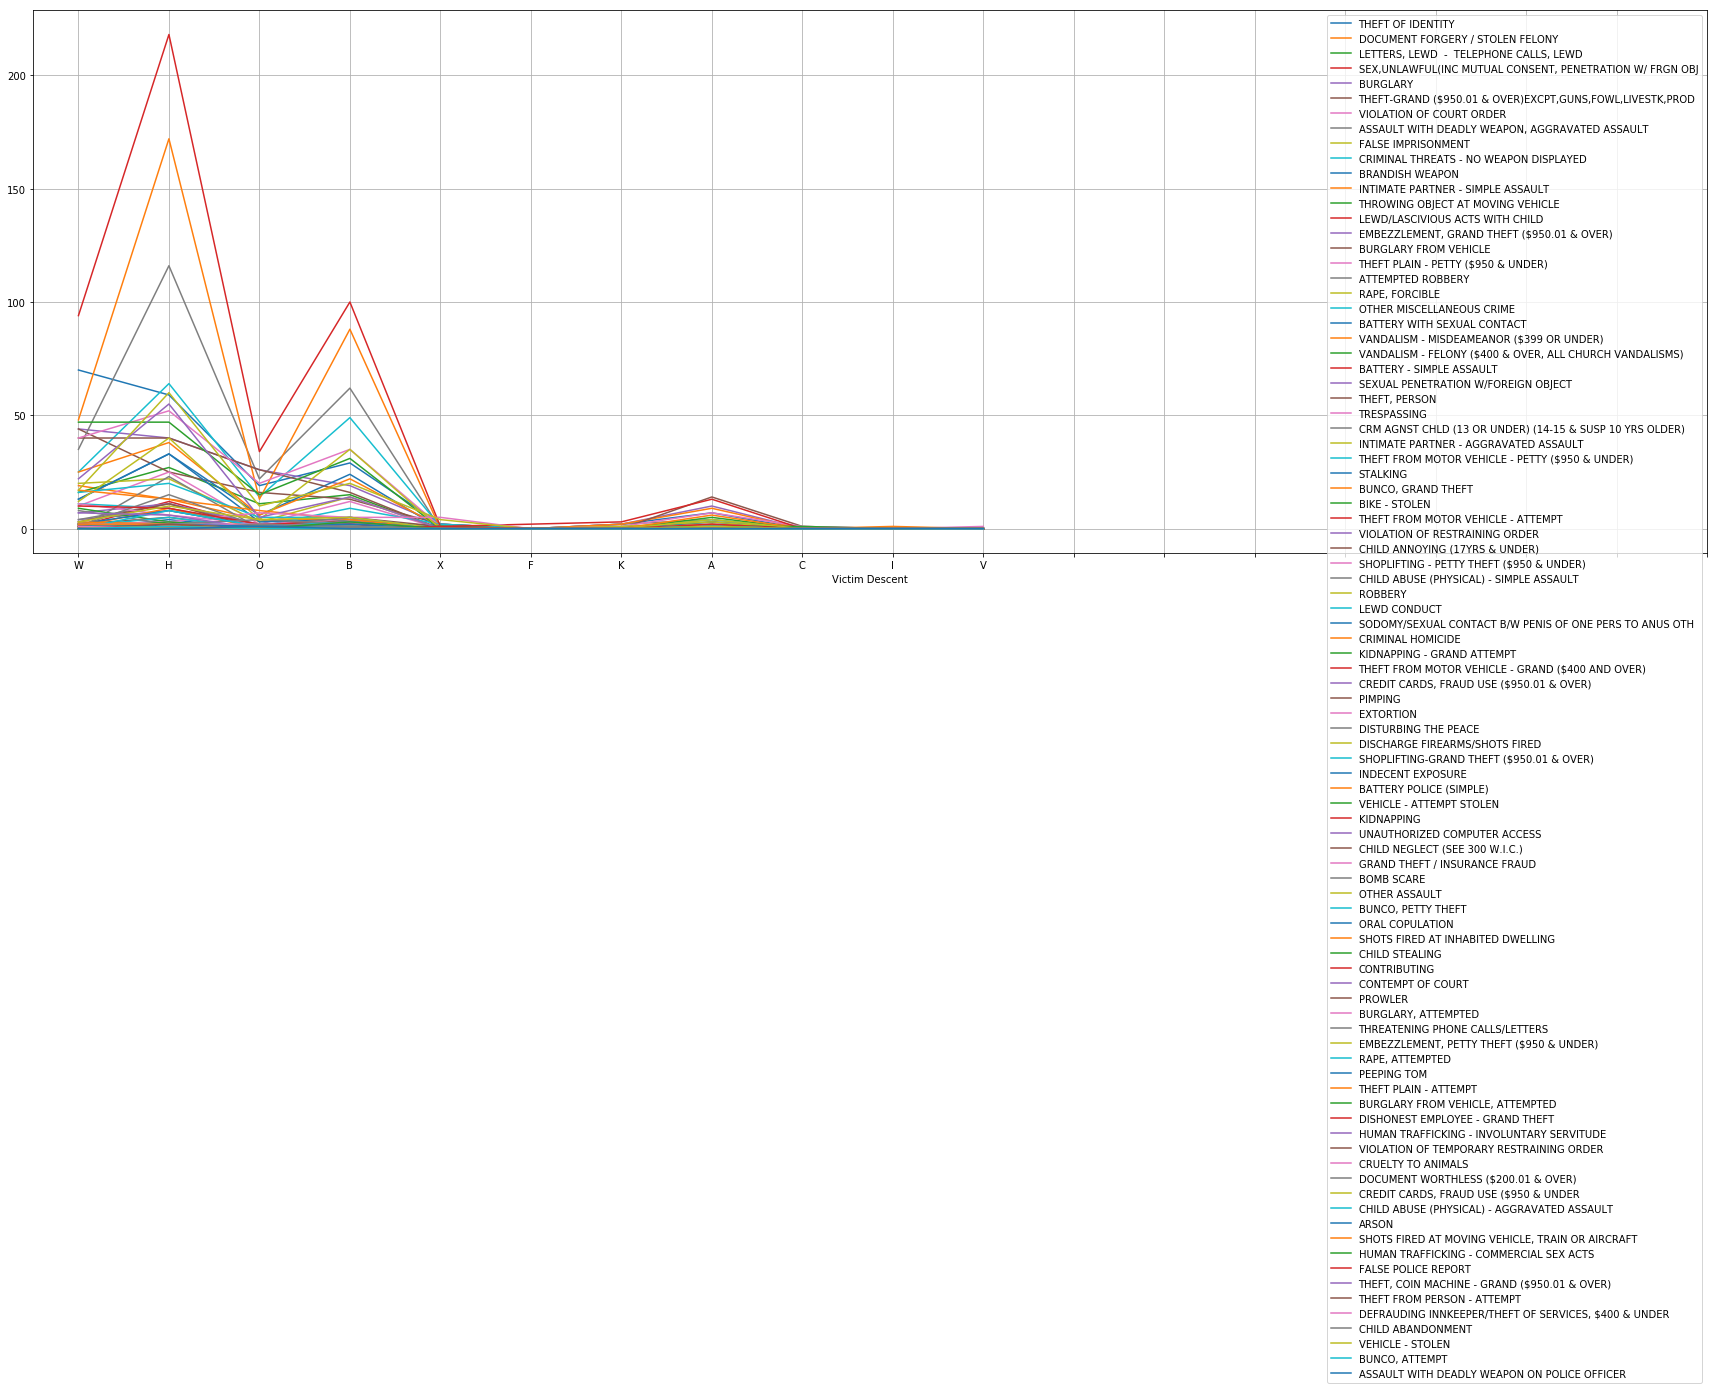

In [121]:
# our final graph for victim descent in 2018
victim_descent_crime_2018.plot(x='Victim Descent', y=crime_type, figsize=(30,10), xticks=(range(0,len(descent_group))), grid=True)